# Final Project - A Quantitative Analysis of Mandiri Bank’s Stock Performance (2015–Present)

By: Rifqi Syaputra

- **Business Context**

Understanding the factors that influence bank stock performance is essential for investors, analysts, and policymakers. Bank Mandiri (BMRI), Indonesia’s largest state-owned commercial bank, plays a key role in the country's financial system, with approximately 60% government ownership and a broad presence across corporate and retail banking. This project examines BMRI’s stock trajectory over the past decade, focusing on how macroeconomic variables—such as interest rates, liquidity conditions, government support, and economic outlook—impact its performance. By applying quantitative methods, the analysis aims to provide insights into the trends and drivers shaping BMRI’s market valuation from 2014 to 2024.

- **Data Source**

This analysis utilizes authentic historical stock price data sourced from https://www.marketwatch.com/investing/stock/bmri/download-data?startDate=1/1/2024&endDate=12/31/2024&countryCode=id & Yahoo Finance

- **Objective**

The goal of the quantitative outlook study is to:
1. **Understand the drivers of BMRI’s stock trajector**y—including financial performance, macroeconomic variables, and analyst sentiment.

2. **Model future stock paths** using statistical or machine learning methods (e.g., ARIMA for price forecast, regression for earnings or margin analysis).

3. **Assess intrinsic and relative value** by comparing forecasts against analyst price targets, historical performance, and fair valuation models.

4. **Inform investor decision-making** by identifying key trends and potential inflection points in earnings, interest margins, and liquidity.

## Importing Libraries

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Load Dataset

In [48]:
df1 = pd.read_csv('data_saham_2015.csv')
df2 = pd.read_csv('data_saham_2016.csv')
df3 = pd.read_csv('data_saham_2017.csv')
df4 = pd.read_csv('data_saham_2018.csv')
df5 = pd.read_csv('data_saham_2019.csv')
df6 = pd.read_csv('data_saham_2020.csv')
df7 = pd.read_csv('data_saham_2021.csv')
df8 = pd.read_csv('data_saham_2022.csv')
df9 = pd.read_csv('data_saham_2023.csv')
df10 = pd.read_csv('data_saham_2024.csv')
df11 = pd.read_csv('data_saham_2025.csv')

In [49]:
dataset = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]

for i, x in enumerate(dataset, 1):
    print(f"\nDataFrame {i}:\n")
    print(x.head(10))


DataFrame 1:

         Date   Open   High    Low  Close       Volume
0  12/30/2015  2,281  2,313  2,275  2,313  104,390,796
1  12/29/2015  2,269  2,281  2,269  2,281   43,547,600
2  12/28/2015  2,175  2,269  2,175  2,250   66,709,204
3  12/23/2015  2,213  2,225  2,188  2,219   51,713,200
4  12/22/2015  2,231  2,231  2,200  2,219   44,916,000
5  12/21/2015  2,181  2,219  2,181  2,219   16,910,000
6  12/18/2015  2,244  2,244  2,181  2,181   93,092,000
7  12/17/2015  2,288  2,288  2,244  2,275   90,298,000
8  12/16/2015  2,213  2,238  2,188  2,238   87,191,204
9  12/15/2015  2,169  2,188  2,144  2,188   55,228,000

DataFrame 2:

         Date   Open   High    Low  Close       Volume
0  12/30/2016  2,894  2,931  2,838  2,894  136,139,592
1  12/29/2016  2,800  2,894  2,775  2,894   77,951,204
2  12/28/2016  2,738  2,788  2,719  2,788   47,457,600
3  12/27/2016  2,694  2,713  2,688  2,700   38,650,800
4  12/23/2016  2,688  2,738  2,681  2,694   54,570,000
5  12/22/2016  2,688  2,706  2,675 

^ Making sure it was able to read the data

## Combining the Dataset

in order to combine, we must first make sure the date format is correct

In [50]:
for i, df in enumerate(dataset, 1):
    print(f"\n📄 DataFrame {i} Info:\n")
    df.info()


📄 DataFrame 1 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    244 non-null    object
 1   Open    244 non-null    object
 2   High    244 non-null    object
 3   Low     244 non-null    object
 4   Close   244 non-null    object
 5   Volume  244 non-null    object
dtypes: object(6)
memory usage: 11.6+ KB

📄 DataFrame 2 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    246 non-null    object
 1   Open    246 non-null    object
 2   High    246 non-null    object
 3   Low     246 non-null    object
 4   Close   246 non-null    object
 5   Volume  246 non-null    object
dtypes: object(6)
memory usage: 11.7+ KB

📄 DataFrame 3 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 

All the date format is stil in `string`

Lets change it into `datetime`

In [51]:
for df in dataset:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [52]:
for i, df in enumerate(dataset, 1):
    print(f"\n📄 DataFrame {i} Info:\n")
    df.info()


📄 DataFrame 1 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    244 non-null    datetime64[ns]
 1   Open    244 non-null    object        
 2   High    244 non-null    object        
 3   Low     244 non-null    object        
 4   Close   244 non-null    object        
 5   Volume  244 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 11.6+ KB

📄 DataFrame 2 Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    246 non-null    datetime64[ns]
 1   Open    246 non-null    object        
 2   High    246 non-null    object        
 3   Low     246 non-null    object        
 4   Close   246 non-null    object        
 5   Volume  246 non-null   

Nice

In [53]:
for i, x in enumerate(dataset, 1):
    print(f"\nDataFrame {i}:\n")
    print(x.head(10))


DataFrame 1:

        Date   Open   High    Low  Close       Volume
0 2015-12-30  2,281  2,313  2,275  2,313  104,390,796
1 2015-12-29  2,269  2,281  2,269  2,281   43,547,600
2 2015-12-28  2,175  2,269  2,175  2,250   66,709,204
3 2015-12-23  2,213  2,225  2,188  2,219   51,713,200
4 2015-12-22  2,231  2,231  2,200  2,219   44,916,000
5 2015-12-21  2,181  2,219  2,181  2,219   16,910,000
6 2015-12-18  2,244  2,244  2,181  2,181   93,092,000
7 2015-12-17  2,288  2,288  2,244  2,275   90,298,000
8 2015-12-16  2,213  2,238  2,188  2,238   87,191,204
9 2015-12-15  2,169  2,188  2,144  2,188   55,228,000

DataFrame 2:

        Date   Open   High    Low  Close       Volume
0 2016-12-30  2,894  2,931  2,838  2,894  136,139,592
1 2016-12-29  2,800  2,894  2,775  2,894   77,951,204
2 2016-12-28  2,738  2,788  2,719  2,788   47,457,600
3 2016-12-27  2,694  2,713  2,688  2,700   38,650,800
4 2016-12-23  2,688  2,738  2,681  2,694   54,570,000
5 2016-12-22  2,688  2,706  2,675  2,688   97,122,79

In [54]:
for i, x in enumerate(dataset, 1):
    print(f"\nDataFrame {i}:\n")
    print(x.tail(5))


DataFrame 1:

          Date   Open   High    Low  Close      Volume
239 2015-01-08  2,725  2,744  2,719  2,738  63,649,600
240 2015-01-07  2,688  2,713  2,681  2,713  50,244,400
241 2015-01-06  2,688  2,706  2,669  2,681  58,600,000
242 2015-01-05  2,713  2,713  2,688  2,700  33,363,200
243 2015-01-02  2,694  2,713  2,688  2,706  84,546,796

DataFrame 2:

          Date   Open   High    Low  Close       Volume
241 2016-01-08  2,275  2,319  2,275  2,319   97,109,204
242 2016-01-07  2,288  2,313  2,275  2,275   92,196,400
243 2016-01-06  2,363  2,381  2,338  2,338  106,147,600
244 2016-01-05  2,313  2,388  2,313  2,344  106,152,400
245 2016-01-04  2,300  2,338  2,269  2,313   60,667,600

DataFrame 3:

          Date   Open   High    Low  Close      Volume
233 2017-01-09  2,856  2,856  2,806  2,819  36,349,200
234 2017-01-06  2,838  2,856  2,819  2,844  54,337,600
235 2017-01-05  2,800  2,831  2,788  2,813  66,554,400
236 2017-01-04  2,825  2,838  2,781  2,838  41,110,400
237 2017-01-03

All the data begin in `December`, lets change that

In [55]:
for i, df in enumerate(dataset):
    if 'Date' in df.columns:
        dataset[i] = df.sort_values(by='Date', ascending=True).reset_index(drop=True)

In [56]:
for i, x in enumerate(dataset, 1):
    print(f"\nDataFrame {i}:\n")
    print(x.head(10))


DataFrame 1:

        Date   Open   High    Low  Close       Volume
0 2015-01-02  2,694  2,713  2,688  2,706   84,546,796
1 2015-01-05  2,713  2,713  2,688  2,700   33,363,200
2 2015-01-06  2,688  2,706  2,669  2,681   58,600,000
3 2015-01-07  2,688  2,713  2,681  2,713   50,244,400
4 2015-01-08  2,725  2,744  2,719  2,738   63,649,600
5 2015-01-09  2,750  2,806  2,738  2,781  170,824,796
6 2015-01-12  2,756  2,781  2,706  2,706   53,126,800
7 2015-01-13  2,719  2,719  2,656  2,688   80,360,796
8 2015-01-14  2,706  2,750  2,681  2,681   59,552,800
9 2015-01-15  2,738  2,738  2,688  2,725  102,689,600

DataFrame 2:

        Date   Open   High    Low  Close       Volume
0 2016-01-04  2,300  2,338  2,269  2,313   60,667,600
1 2016-01-05  2,313  2,388  2,313  2,344  106,152,400
2 2016-01-06  2,363  2,381  2,338  2,338  106,147,600
3 2016-01-07  2,288  2,313  2,275  2,275   92,196,400
4 2016-01-08  2,275  2,319  2,275  2,319   97,109,204
5 2016-01-11  2,275  2,288  2,250  2,275   62,974,00

### Combining Data

In [57]:
df = pd.concat(dataset, ignore_index=True)

# Sort by 'Date' in ascending order
df = df.sort_values('Date').reset_index(drop=True)

## Data Understanding

In [58]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,"2,694","2,713","2,688","2,706","84,546,796"
1,2015-01-05,"2,713","2,713","2,688","2,700","33,363,200"
2,2015-01-06,"2,688","2,706","2,669","2,681","58,600,000"
3,2015-01-07,"2,688","2,713","2,681","2,713","50,244,400"
4,2015-01-08,"2,725","2,744","2,719","2,738","63,649,600"


In [59]:
df.tail()

,Date,Open,High,Low,Close,Volume
2577,2025-09-02,"4,610","4,670","4,560","4,570","150,045,594"
2578,2025-09-03,"4,620","4,660","4,570","4,620","131,617,906"
2579,2025-09-04,"4,630","4,680","4,620","4,680","88,735,297"
2580,2025-09-08,"4,750","4,750","4,460","4,490","200,234,500"
2581,2025-09-09,"4,450","4,480","4,310","4,310","509,366,594"


In [60]:
df.shape

(2582, 6)

## Data Inspection

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2582 non-null   datetime64[ns]
 1   Open    2582 non-null   object        
 2   High    2582 non-null   object        
 3   Low     2582 non-null   object        
 4   Close   2582 non-null   object        
 5   Volume  2582 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 121.2+ KB


In [62]:
df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

No missing value

but the number format is stil in `string`, lets change it first into `Integers`

In [63]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,"2,694","2,713","2,688","2,706","84,546,796"
1,2015-01-05,"2,713","2,713","2,688","2,700","33,363,200"
2,2015-01-06,"2,688","2,706","2,669","2,681","58,600,000"
3,2015-01-07,"2,688","2,713","2,681","2,713","50,244,400"
4,2015-01-08,"2,725","2,744","2,719","2,738","63,649,600"


there are "," in the number

In [64]:
df['Open'] = df['Open'].str.replace(',','', regex=False)
df['High'] = df['High'].str.replace(',','', regex=False)
df['Low'] = df['Low'].str.replace(',','', regex=False)
df['Close'] = df['Close'].str.replace(',','', regex=False)
df['Volume'] = df['Volume'].str.replace(',','', regex=False)

In [65]:
df['Open'] = pd.to_numeric(df['Open'], errors='coerce').astype('Int64')
df['High'] = pd.to_numeric(df['High'], errors='coerce').astype('Int64')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce').astype('Int64')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce').astype('Int64')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce').astype('Int64')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2582 non-null   datetime64[ns]
 1   Open    2582 non-null   Int64         
 2   High    2582 non-null   Int64         
 3   Low     2582 non-null   Int64         
 4   Close   2582 non-null   Int64         
 5   Volume  2582 non-null   Int64         
dtypes: Int64(5), datetime64[ns](1)
memory usage: 133.8 KB


In [67]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-01-02,2694,2713,2688,2706,84546796
1,2015-01-05,2713,2713,2688,2700,33363200
2,2015-01-06,2688,2706,2669,2681,58600000
3,2015-01-07,2688,2713,2681,2713,50244400
4,2015-01-08,2725,2744,2719,2738,63649600


In [68]:
df.set_index('Date', inplace=True)

In [69]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,2694,2713,2688,2706,84546796
2015-01-05,2713,2713,2688,2700,33363200
2015-01-06,2688,2706,2669,2681,58600000
2015-01-07,2688,2713,2681,2713,50244400
2015-01-08,2725,2744,2719,2738,63649600


In [70]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2025-09-02,4610,4670,4560,4570,150045594
2025-09-03,4620,4660,4570,4620,131617906
2025-09-04,4630,4680,4620,4680,88735297
2025-09-08,4750,4750,4460,4490,200234500
2025-09-09,4450,4480,4310,4310,509366594


In [71]:
import yfinance as yf

# Download historical data with auto_adjust=True (default)
data = yf.download('BMRI.JK', start='2015-01-02', end='2025-09-09', auto_adjust=True)

# Check the columns
print(data.columns)  # Output: ['Open', 'High', 'Low', 'Close', 'Volume']

# The 'Close' column contains adjusted prices
print(data['Close'])

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'BMRI.JK'),
            (  'High', 'BMRI.JK'),
            (   'Low', 'BMRI.JK'),
            (  'Open', 'BMRI.JK'),
            ('Volume', 'BMRI.JK')],
           names=['Price', 'Ticker'])
Ticker          BMRI.JK
Date                   
2015-01-02  1727.264526
2015-01-05  1723.275269
2015-01-06  1711.307983
2015-01-07  1731.253662
2015-01-08  1747.209839
...                 ...
2025-09-01  4600.000000
2025-09-02  4570.000000
2025-09-03  4620.000000
2025-09-04  4680.000000
2025-09-08  4490.000000

[2632 rows x 1 columns]


Adding `Adj_Price` Column

In [72]:
df['adj_close'] = data['Close']

In [73]:
df.head()

,Open,High,Low,Close,Volume,adj_close
Date,,,,,,
2015-01-02,2694,2713,2688,2706,84546796,1727.264526
2015-01-05,2713,2713,2688,2700,33363200,1723.275269
2015-01-06,2688,2706,2669,2681,58600000,1711.307983
2015-01-07,2688,2713,2681,2713,50244400,1731.253662
2015-01-08,2725,2744,2719,2738,63649600,1747.209839


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2582 entries, 2015-01-02 to 2025-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2582 non-null   Int64  
 1   High       2582 non-null   Int64  
 2   Low        2582 non-null   Int64  
 3   Close      2582 non-null   Int64  
 4   Volume     2582 non-null   Int64  
 5   adj_close  2581 non-null   float64
dtypes: Int64(5), float64(1)
memory usage: 153.8 KB


In [75]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
adj_close    1
dtype: int64

In [76]:
df.ffill(inplace=True)

In [77]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
adj_close    0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2582 entries, 2015-01-02 to 2025-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2582 non-null   Int64  
 1   High       2582 non-null   Int64  
 2   Low        2582 non-null   Int64  
 3   Close      2582 non-null   Int64  
 4   Volume     2582 non-null   Int64  
 5   adj_close  2582 non-null   float64
dtypes: Int64(5), float64(1)
memory usage: 153.8 KB


In [79]:
df.reset_index(inplace=True) 

In [80]:
df.head()

,Date,Open,High,Low,Close,Volume,adj_close
0,2015-01-02,2694,2713,2688,2706,84546796,1727.264526
1,2015-01-05,2713,2713,2688,2700,33363200,1723.275269
2,2015-01-06,2688,2706,2669,2681,58600000,1711.307983
3,2015-01-07,2688,2713,2681,2713,50244400,1731.253662
4,2015-01-08,2725,2744,2719,2738,63649600,1747.209839


In [81]:
df1 = df[['Date','adj_close']].copy(deep=True)
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date',inplace = True)
df1.rename(columns={'adj_close': 'Price'}, inplace=True)
df1 = df1.resample('W').mean()
df1.ffill(inplace=True)

In [87]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,adj_close
Date,,,,,,
2015-01-02,2694,2713,2688,2706,84546796,1727.264526
2015-01-05,2713,2713,2688,2700,33363200,1723.275269
2015-01-06,2688,2706,2669,2681,58600000,1711.307983
2015-01-07,2688,2713,2681,2713,50244400,1731.253662
2015-01-08,2725,2744,2719,2738,63649600,1747.209839


## EDA

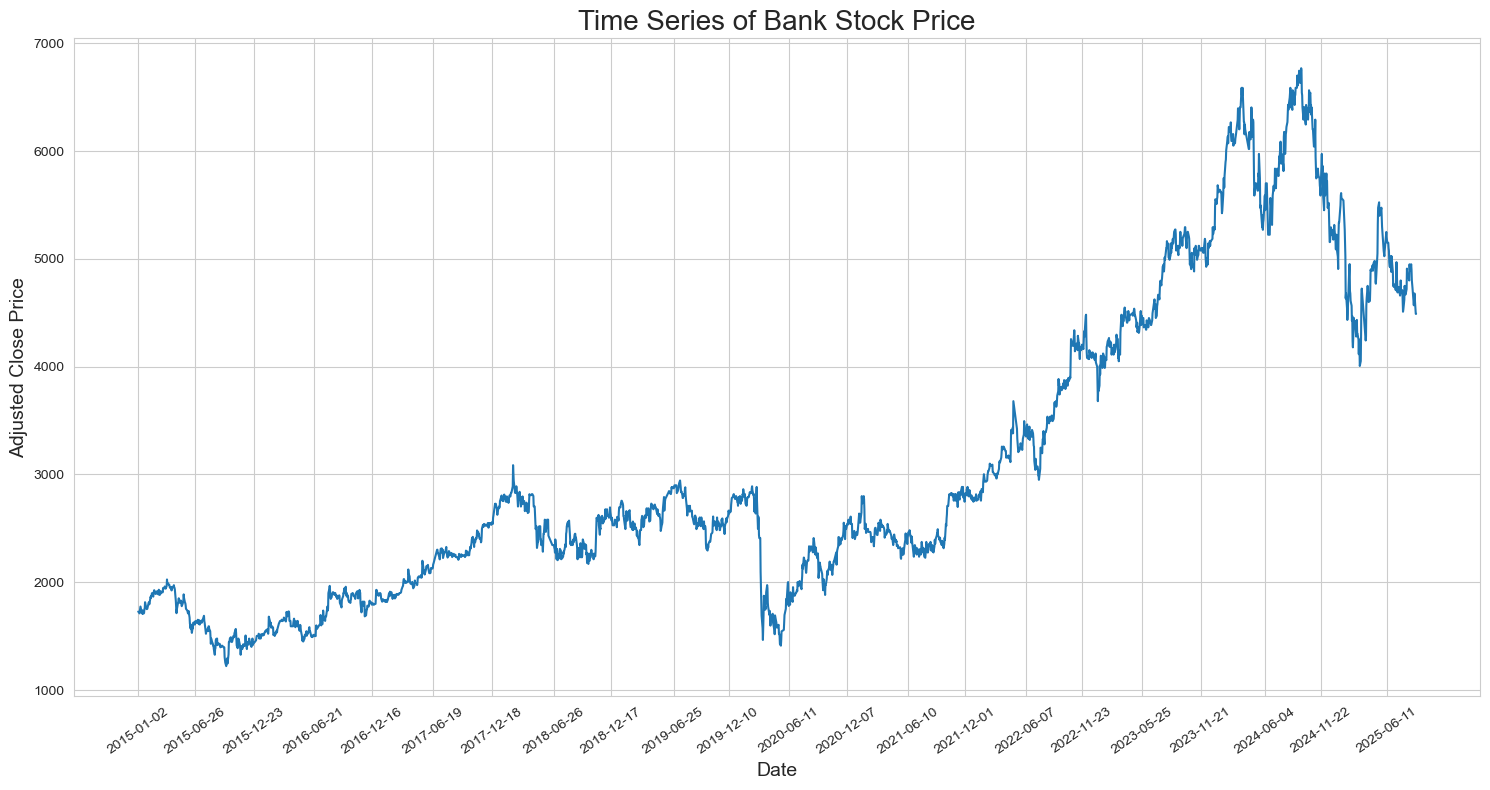

In [89]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
ax=sns.lineplot(data=df, x=df.index, y='adj_close')

# Set x-axis ticks for every 50th data point
n = 120  
plt.xticks(df.index[::n])

# Rotate x-axis labels for better readability
plt.xticks(rotation=35)

plt.title("Time Series of Bank Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.tight_layout()
plt.show()

In [90]:
df1.head()

,Price
Date,
2015-01-04,1727.264526
2015-01-11,1737.635986
2015-01-18,1720.084058
2015-01-25,1749.603198
2015-02-01,1759.177051


In [96]:
df['weekly_return'] = df['adj_close'].pct_change() * 100

# Moving Average to know where the trend go
df['MA50'] = df['adj_close'].rolling(window=50).mean()
df['MA200'] = df['adj_close'].rolling(window=200).mean()

# Volatility (to measure how risky the stock is)
# High volatility in 1 month = Bad
# Low volatility in 1 month = Good
df['Volatility'] = df['weekly_return'].rolling(window=21).std()

# Cumulative Return (to measure how much is Rp.1000 if it was invested at the beginning)
df['Growth_of_1_lot'] = 172700 * (1 + df['weekly_return']/100).cumprod()

**Context:**

**The 200-Day Moving Average (MA200)**: This is the long-term trend. It's a smoothed-out line representing the average consensus of a stock's value over the past 200 trading days (about 10 months). It's a major support/resistance level. If the price is above it, the long-term health is considered strong.

**The 50-Day Moving Average (MA50)**: This is the medium-term trend. It reflects the average price over about 2.5 months and is more sensitive to recent price changes.

**The scenario when "Golden Cross" (50-day crosses above 200-day)**:

- The stock has been in a long-term downtrend or consolidation (trading below its 200-day MA).

- A sustained rally begins, pushing the price higher. This rally is strong enough to first lift the price above the 200-day MA, and then lift the shorter-term 50-day MA above it as well.

- This crossover is a clear, undeniable signal on the chart that the trend has likely reversed. Technical traders and algorithms see this signal and interpret it as a "buy" sign.

- This collective action—a wave of new buying triggered by the signal—itself pushes the price even higher, making the signal "work." It becomes a self-fulfilling prophecy.

**The "Death Cross" (50-day crosses below 200-day)**:

- The stock has been in an uptrend (trading above its 200-day MA).

- A sustained decline begins. The price falls below the 200-day MA, and the decline continues until the 50-day MA also drops below it.

- This is interpreted as a confirmation that the bull market is over. Investors who use technical analysis see this and start selling to protect their profits.

- This wave of selling pressure contributes to pushing the price lower, reinforcing the bearish signal.

**Moving Averages (MA) are widely regarded as reliable indicators, as their effectiveness has been extensively tested and validated by quantitative analysts.**

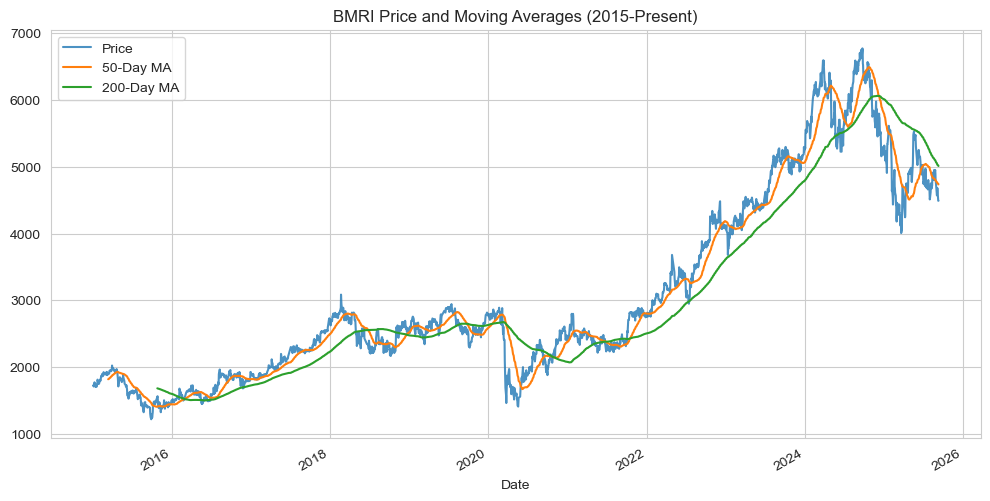

In [92]:
plt.figure(figsize=(12,6))
df['adj_close'].plot(label='Price', alpha=0.8)
df['MA50'].plot(label='50-Day MA')
df['MA200'].plot(label='200-Day MA')
plt.title(f'BMRI Price and Moving Averages (2015-Present)')
plt.legend()
plt.show()

### **EDA Question 1**:

What is the overall trend, ignoring daily noise?

**Insight**:
1. **The Long-Term Direction (The 200-Day MA)**
    - You can see this line slopes steadily upward from left to right over the entire 10-year period. This is the clearest possible sign of a long-term bull market. The foundation of the stock is consistently getting higher.

2. **The Price Action (The Blue Line)**
    - Crucially, even during its biggest dips (like in 2016 and 2020), the price always found support and bounced off the rising 200-day MA. It never broke down below this foundation for a sustained period.
    - The long-term trend is so powerful that every major decline was a buying opportunity, not the start of a new bear market.

3. **The Medium-Term Momentum (The 50-Day MA)**
    - For almost the entire chart, the 50-day MA is above the 200-day MA. This is a classic bullish signal known as a "Golden Cross." It means the recent average price is higher than the long-term average price, confirming upward momentum.
    - The stock's momentum has consistently been positive, reinforcing the strong long-term trend.

4. **The Recent Situation (2024-2025)**
    - Beginning in September 2024, the stock entered its first downtrend following a sustained bull run that began in 2020
    - According to the Senior Vice President of Lembaga Pengembangan Perbankan Indonesia (LPPI), the downtrend was driven by negative macroeconomic data, which tends to have an immediate impact on banking stock price. (https://www.cnbcindonesia.com/market/20250603081938-17-638027/penyebab-saham-bank-keok-data-ekonomi-hingga-profit-taking)

### **EDA Question 2:**

How risky has the stock been?

### **EDA Question 3:**

When did the highest volatility occurred?

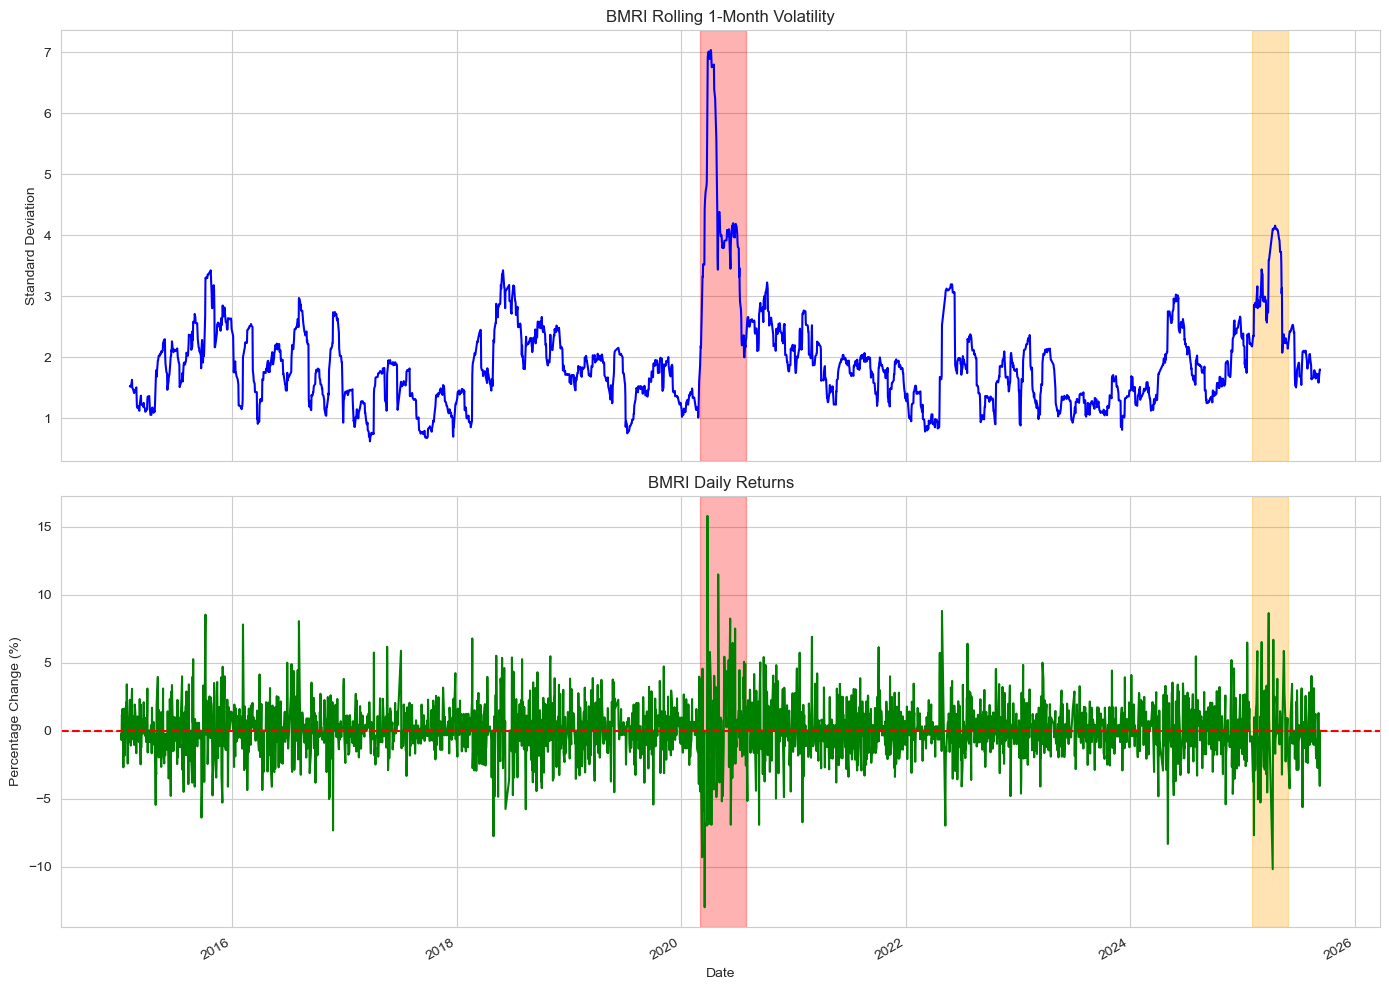

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

# Plot 1: Rolling 1-Month Volatility
df['Volatility'].plot(ax=axes[0], color='blue')
axes[0].set_title('BMRI Rolling 1-Month Volatility')
axes[0].set_ylabel('Standard Deviation')
axes[0].axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-07-29'),
            color='red', alpha=0.3)
axes[0].axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-05-29'),
            color='orange', alpha=0.3)

# Plot 2: Daily Returns
df['weekly_return'].plot(ax=axes[1], color='green')
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_title('BMRI Daily Returns')
axes[1].set_ylabel('Percentage Change (%)')
axes[1].axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-07-29'),
            color='red', alpha=0.3)
axes[1].axvspan(pd.to_datetime('2025-02-01'), pd.to_datetime('2025-05-29'),
            color='orange', alpha=0.3)

# Add x-axis label only to the bottom plot
axes[1].set_xlabel('Date')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Insight**:
- According to the graph, the highest level of volatility occurred in `2020`, coinciding with the onset of the **COVID-19 outbreak**. The strict lockdown during the outbreak subsequently weakened the macroeconomy, thereby affecting bank stock prices. 
- **More recently**, the second-highest price volatility was observed in `2025`, following large-scale demonstrations in front of the Indonesian Parliament building.

### **EDA Question 4:**

How much money would I have made if i bought 1 lot (100 sheets) of stock at the beggining of the year 2014?

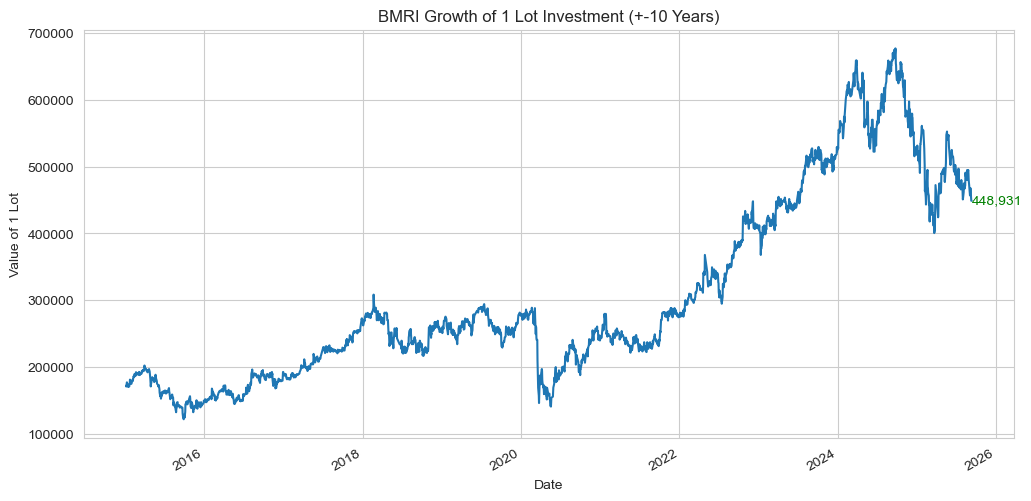

In [104]:
plt.figure(figsize=(12,6))
df['Growth_of_1_lot'].plot()
plt.title(f'BMRI Growth of 1 Lot Investment (+-10 Years)')
last_date = df.index[-1]
last_value = df['Growth_of_1_lot'].iloc[-1]
plt.text(last_date, last_value, f'{last_value:,.0f}', 
         fontsize=10, color='green', ha='left', va='center')
plt.ylabel('Value of 1 Lot')
plt.show()

**Insight**:
- If I had purchased 1 lot (100 shares) of `BMRI` stock at the beginning of 2015, its value would have grown to **Rp.448.931** today.
- That is `160%` Increase in the span of 10 years

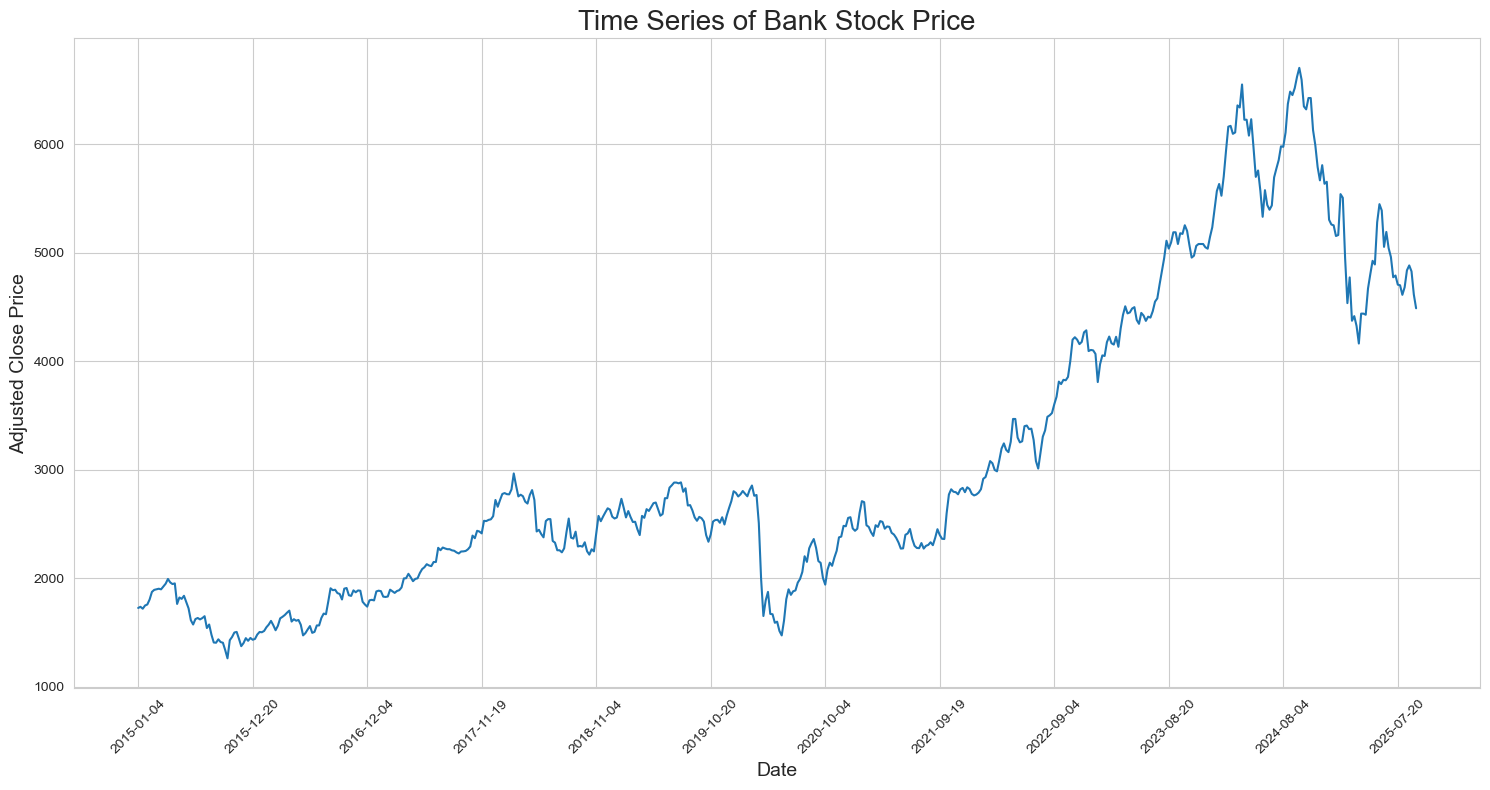

In [107]:
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
ax=sns.lineplot(data=df1, x=df1.index, y='Price')

# Set x-axis ticks for every 50th data point
n = 50  
plt.xticks(df1.index[::n])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.title("Time Series of Bank Stock Price", fontsize=20)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price", fontsize=14)
plt.tight_layout()
plt.show()

Is my data Stationary?

Time series analysis as far as i know **require**  the data to be stationary

### Augmented Dickey-Fuller (ADF) Test / Stationary Test

In [108]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,8))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [109]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(15, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [111]:
df1.head()

,Price
Date,
2015-01-04,1727.264526
2015-01-11,1737.635986
2015-01-18,1720.084058
2015-01-25,1749.603198
2015-02-01,1759.177051


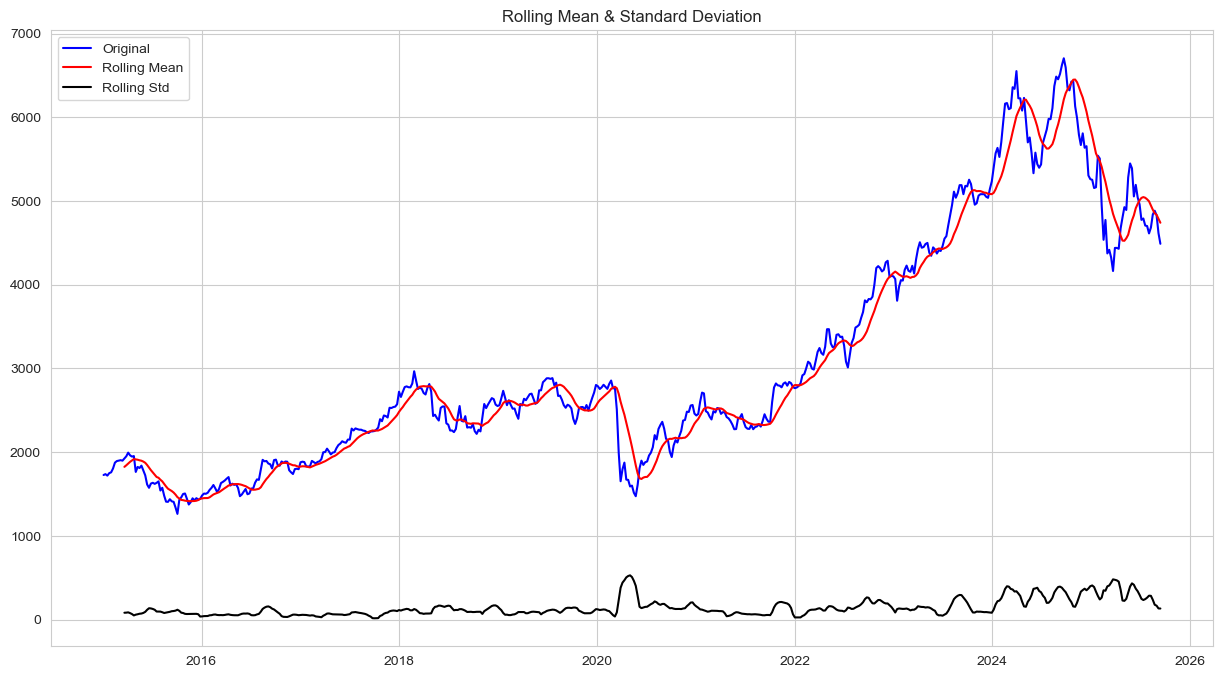

Results of Dickey-Fuller Test:
Test Statistic                  -0.788353
p-value                          0.822519
#Lags Used                      11.000000
Number of Observations Used    547.000000
Critical Value (1%)             -3.442361
Critical Value (5%)             -2.866838
Critical Value (10%)            -2.569592
dtype: float64


In [112]:
test_stationarity(df1['Price'])

A **P-Value** of **0.822519** from ADF test indicates that the data is `NOT Stationary`

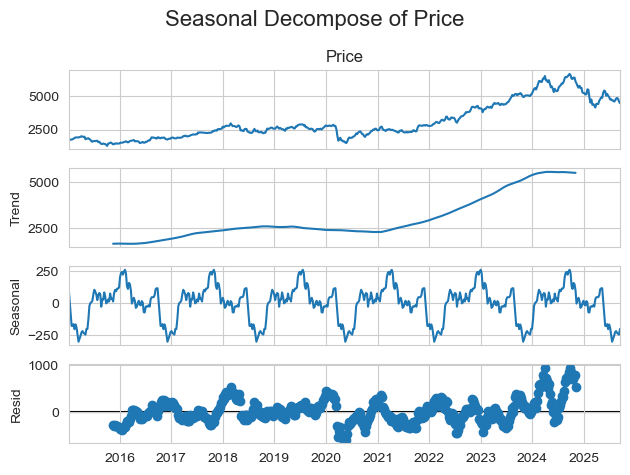

In [113]:
dec = sm.tsa.seasonal_decompose(df1['Price'], period=90).plot()

plt.suptitle('Seasonal Decompose of Price', fontsize=16)
plt.tight_layout()
plt.show()

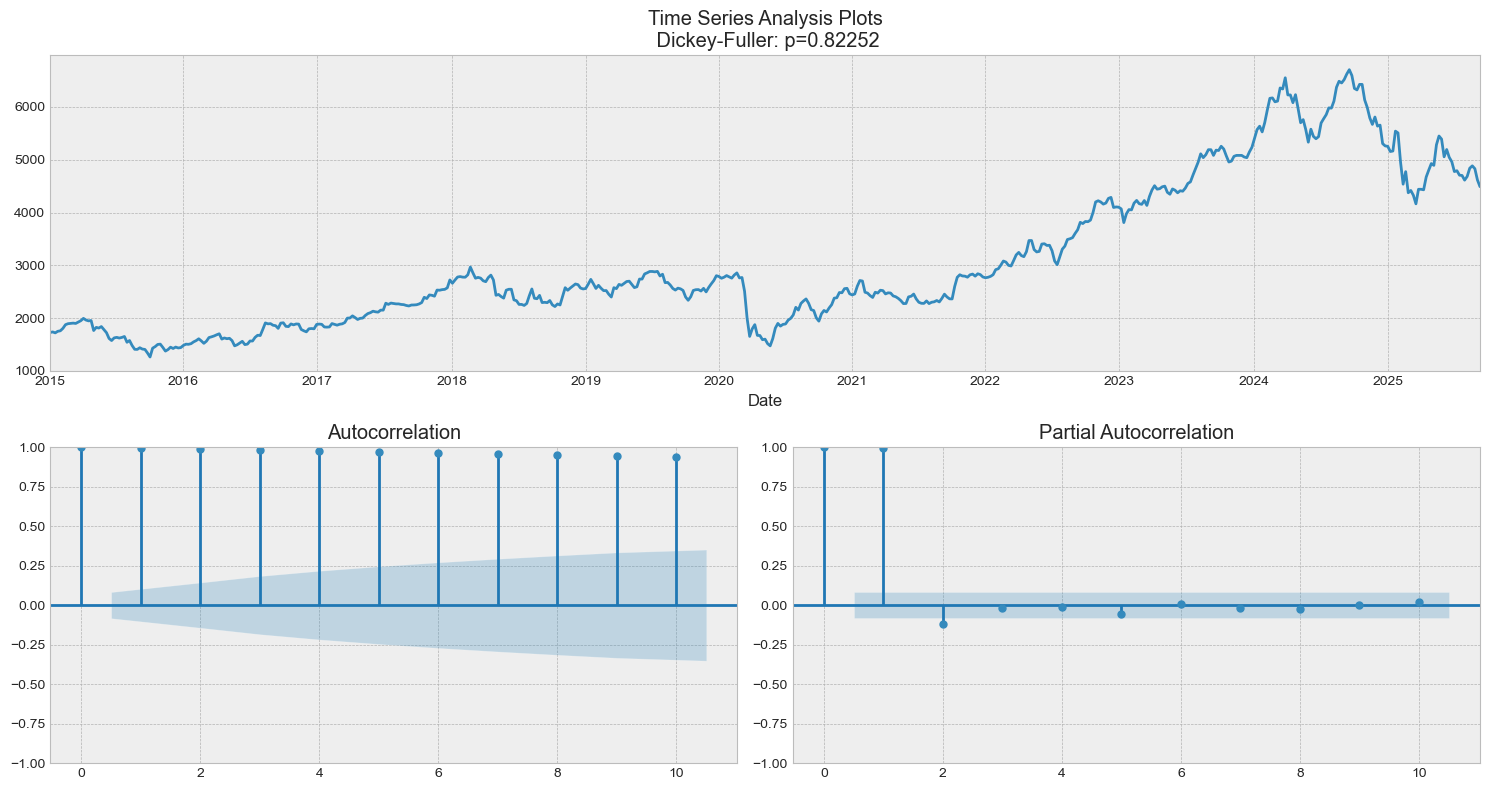

In [114]:
tsplot(df1['Price'], lags = 10)

**Autocorrelation Insight**:
- Bars at all lags are high and outside the blue band (Strong autocorrelation (non-stationary))

- The autocorrelation at lag 1 through lag 10 is very high, close to 1.

- All bars are well outside the blue shaded area, meaning the autocorrelations are statistically significant.

- This pattern suggests the time series has strong autocorrelation **(past values heavily influence future values)**.

#### Due to not being a stationary data, we first need to transfom it to stabilize the variance

## Transformation

The Transformation process of a data can be done using a couple of method. in oreder to find what method is tha best to transform our data, we need to conduct a test for each of the method.

The method that we are going to test is:
- **Differencing**

- **Logarithmic Transformation**

- **Detrending**

- **Seasonal Adjustment**

- **Rolling Statistics**

In [117]:
df2 = df1.copy()
df2.head()

,Price
Date,
2015-01-04,1727.264526
2015-01-11,1737.635986
2015-01-18,1720.084058
2015-01-25,1749.603198
2015-02-01,1759.177051


### Differencing

In [118]:
df2['Price_Diff'] = df2['Price'].diff()
df2.head()

,Price,Price_Diff
Date,,
2015-01-04,1727.264526,NaN
2015-01-11,1737.635986,10.371460
2015-01-18,1720.084058,-17.551929
2015-01-25,1749.603198,29.519141
2015-02-01,1759.177051,9.573853


### Logarithmic Transformation

In [119]:
df2['Price_Log'] = np.log(df2['Price'])
df2.head()

,Price,Price_Diff,Price_Log
Date,,,
2015-01-04,1727.264526,NaN,7.454294
2015-01-11,1737.635986,10.371460,7.460281
2015-01-18,1720.084058,-17.551929,7.450128
2015-01-25,1749.603198,29.519141,7.467144
2015-02-01,1759.177051,9.573853,7.472601


### Detrending

In [120]:
df2['Price_Detrended'] = df2['Price'] - df2['Price'].rolling(window=30).mean()  # Adjust the window size as needed
df2.head()

,Price,Price_Diff,Price_Log,Price_Detrended
Date,,,,
2015-01-04,1727.264526,NaN,7.454294,NaN
2015-01-11,1737.635986,10.371460,7.460281,NaN
2015-01-18,1720.084058,-17.551929,7.450128,NaN
2015-01-25,1749.603198,29.519141,7.467144,NaN
2015-02-01,1759.177051,9.573853,7.472601,NaN


### Seasonal Adjustment

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_sd = seasonal_decompose(df2['Price'], model='additive', period=52)  # Assuming weekly seasonality, adjust period accordingly
df2['Price_Seasonal_Adjusted'] = df2['Price'] - result_sd.seasonal
df2.head()

,Price,Price_Diff,Price_Log,Price_Detrended,Price_Seasonal_Adjusted
Date,,,,,
2015-01-04,1727.264526,NaN,7.454294,NaN,1695.140124
2015-01-11,1737.635986,10.371460,7.460281,NaN,1715.309675
2015-01-18,1720.084058,-17.551929,7.450128,NaN,1678.469241
2015-01-25,1749.603198,29.519141,7.467144,NaN,1703.613552
2015-02-01,1759.177051,9.573853,7.472601,NaN,1682.678979


### Rolling Statistic

In [122]:
window_size = 30  # Adjust the window size as needed
df2['Price_Rolling_Mean'] = df2['Price'].rolling(window=window_size).mean()
df2['Price_Rolling_Std'] = df2['Price'].rolling(window=window_size).std()
df2.head()

,Price,Price_Diff,Price_Log,Price_Detrended,Price_Seasonal_Adjusted,Price_Rolling_Mean,Price_Rolling_Std
Date,,,,,,,
2015-01-04,1727.264526,NaN,7.454294,NaN,1695.140124,NaN,NaN
2015-01-11,1737.635986,10.371460,7.460281,NaN,1715.309675,NaN,NaN
2015-01-18,1720.084058,-17.551929,7.450128,NaN,1678.469241,NaN,NaN
2015-01-25,1749.603198,29.519141,7.467144,NaN,1703.613552,NaN,NaN
2015-02-01,1759.177051,9.573853,7.472601,NaN,1682.678979,NaN,NaN


## Testing Stationarity of the Transformed Data 

#### Hypothesis

$H_0$ : The time series is `Non-Stationary`

$H_1$ : The time series `Is Stationary`


In [123]:
df2.isna().sum()

Price                       0
Price_Diff                  1
Price_Log                   0
Price_Detrended            29
Price_Seasonal_Adjusted     0
Price_Rolling_Mean         29
Price_Rolling_Std          29
dtype: int64

In [124]:
df2.dropna(inplace=True)
df2.head()

,Price,Price_Diff,Price_Log,Price_Detrended,Price_Seasonal_Adjusted,Price_Rolling_Mean,Price_Rolling_Std
Date,,,,,,,
2015-07-26,1651.092977,17.593669,7.409193,-142.306298,1770.461770,1793.399275,124.051982
2015-08-02,1542.012598,-109.080379,7.340844,-245.211613,1638.618259,1787.224210,131.824785
2015-08-09,1574.493140,32.480542,7.361689,-207.292976,1596.996449,1781.786116,137.196533
2015-08-16,1480.299731,-94.193408,7.300000,-293.493573,1495.397614,1773.793305,147.512024
2015-08-23,1408.842499,-71.457233,7.250524,-353.592116,1402.494344,1762.434615,161.860674


### Differencing Method test

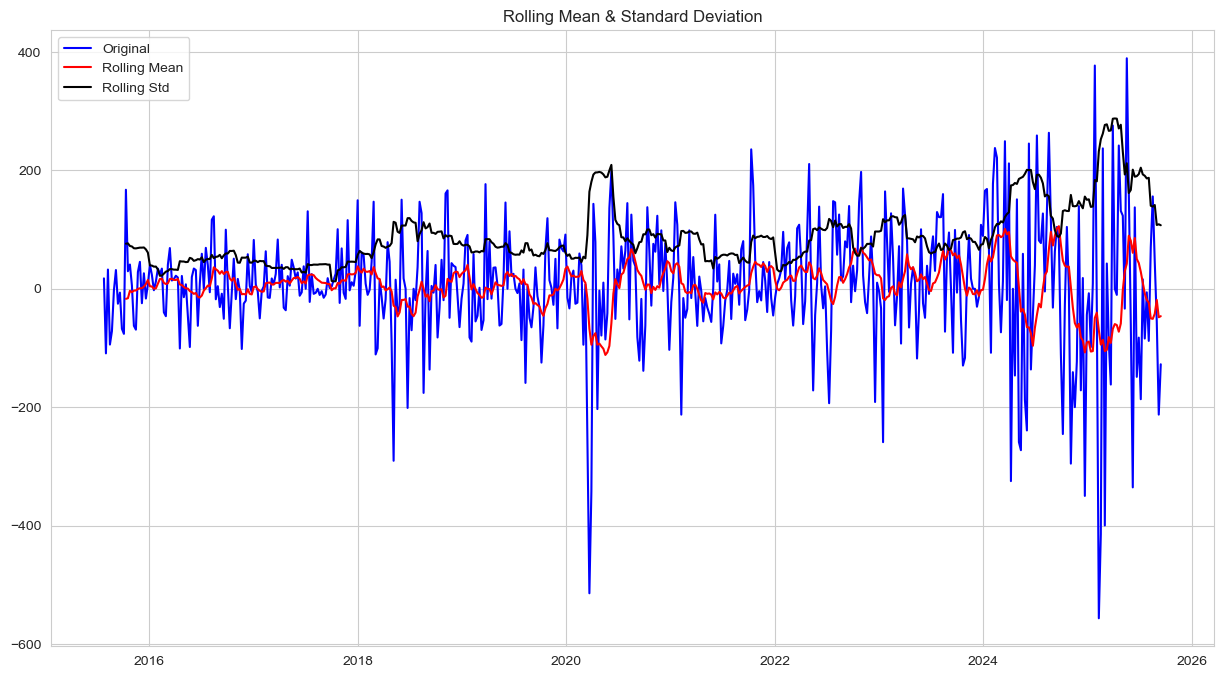

Results of Dickey-Fuller Test:
Test Statistic                -8.250003e+00
p-value                        5.423090e-13
#Lags Used                     1.000000e+01
Number of Observations Used    5.190000e+02
Critical Value (1%)           -3.443013e+00
Critical Value (5%)           -2.867125e+00
Critical Value (10%)          -2.569745e+00
dtype: float64


In [125]:
test_stationarity(df2['Price_Diff'])

**Insight**:
- Test Statistic = **-8.25** (Much lower than Critical value (1%))
- P-Value = **5.42 x $10^{-13}$** is Far below the alpha **0.05**, or even **0.01**
- strong candidate
- Reject $H_0$ 

### Logarithmic Transformation Method test

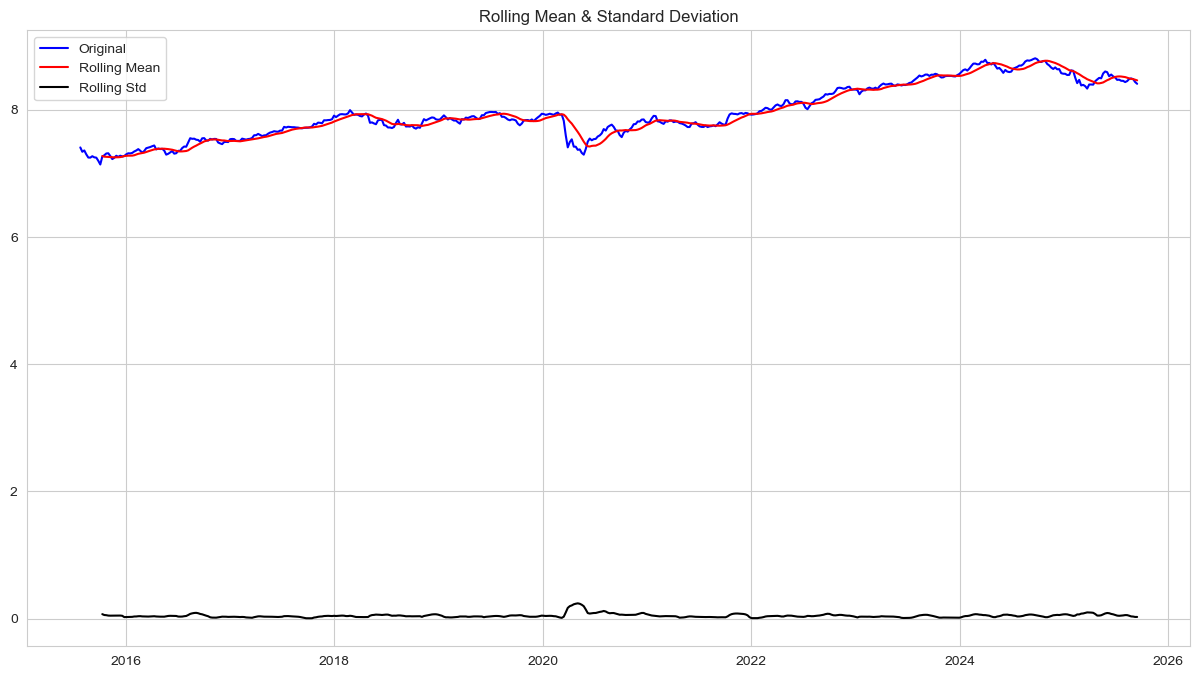

Results of Dickey-Fuller Test:
Test Statistic                  -1.222682
p-value                          0.663763
#Lags Used                       2.000000
Number of Observations Used    527.000000
Critical Value (1%)             -3.442820
Critical Value (5%)             -2.867040
Critical Value (10%)            -2.569699
dtype: float64


In [126]:
test_stationarity(df2['Price_Log'])

**Insight**:
- P-Value = 0.66, Higher then the alpha (0.05)
- Accept $H_0$ 
- Data is not stationary

### Detrending Method test

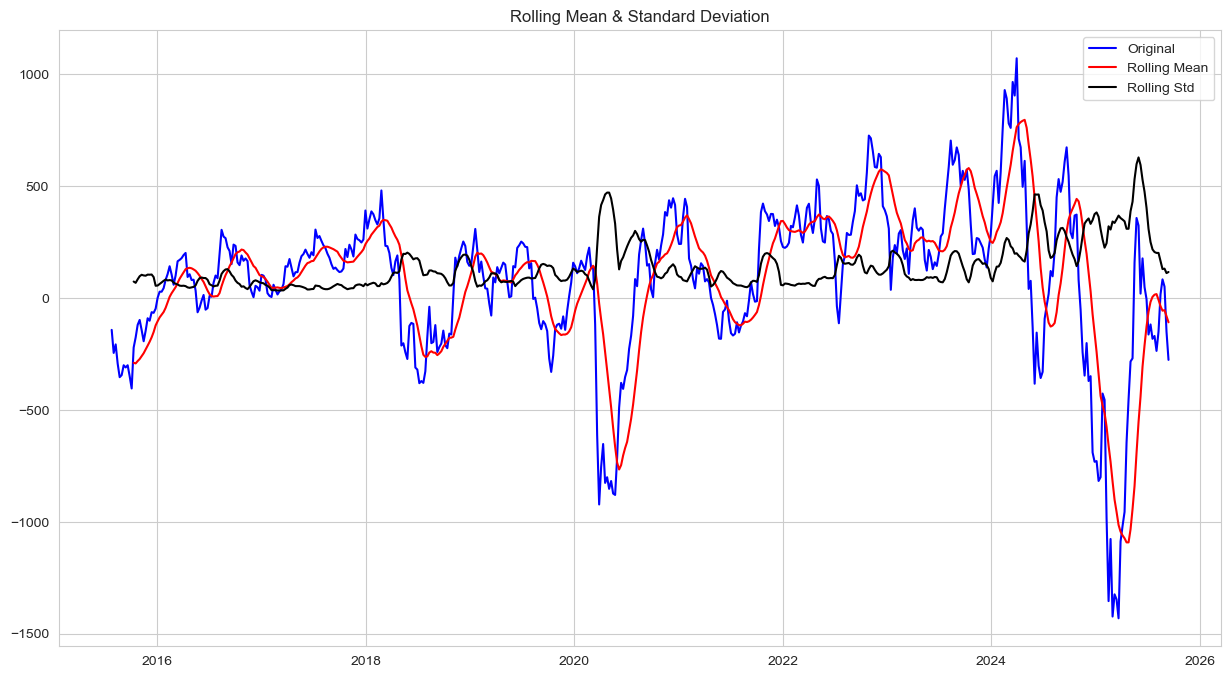

Results of Dickey-Fuller Test:
Test Statistic                  -4.022092
p-value                          0.001299
#Lags Used                      11.000000
Number of Observations Used    518.000000
Critical Value (1%)             -3.443037
Critical Value (5%)             -2.867136
Critical Value (10%)            -2.569750
dtype: float64


In [127]:
test_stationarity(df2['Price_Detrended'])

**Insight**:
- Test Statistic = **-4.02** (even lower than Critical value (1%))
- P-Value = **0.001299** is Far below the alpha **0.05**, or even **0.01** 
- a strong candidate
- Reject $H_0$ 

### Seasonal Adjustment Method test

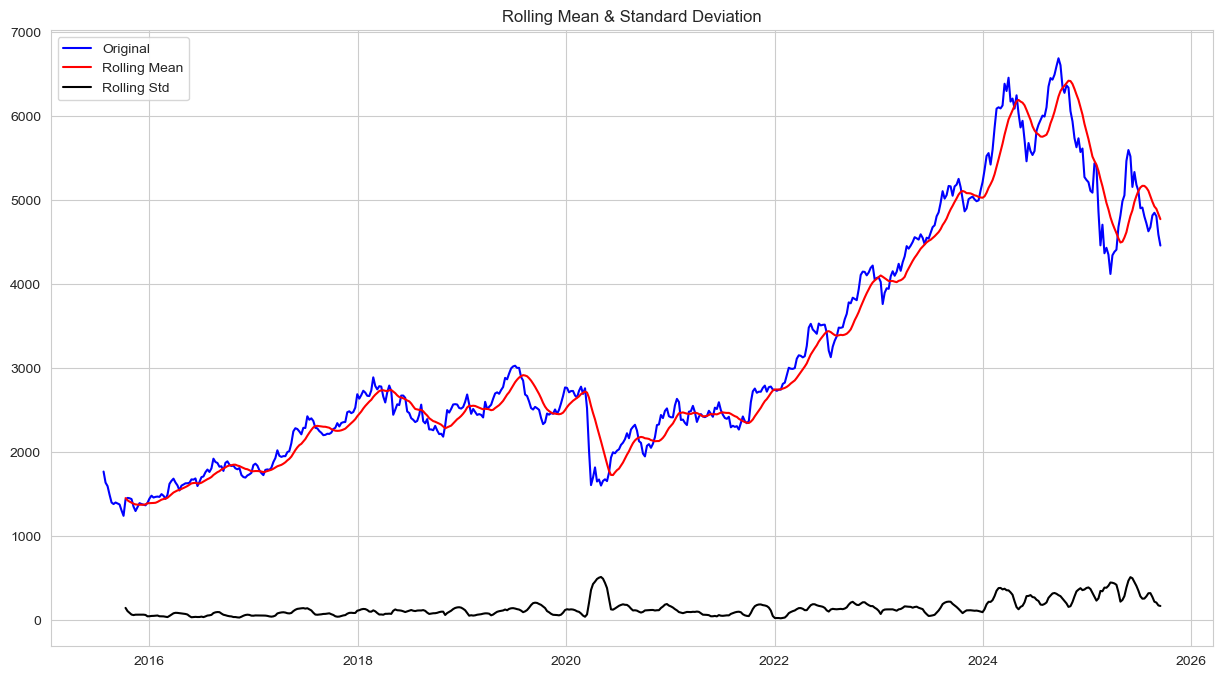

Results of Dickey-Fuller Test:
Test Statistic                  -0.938071
p-value                          0.775177
#Lags Used                      11.000000
Number of Observations Used    518.000000
Critical Value (1%)             -3.443037
Critical Value (5%)             -2.867136
Critical Value (10%)            -2.569750
dtype: float64


In [128]:
test_stationarity(df2['Price_Seasonal_Adjusted'])

**Insight**:
- P-Value = 0.77, Higher then the alpha (0.05)
- Accept $H_0$ 
- Data is not stationary

### Rolling Mean Method testing

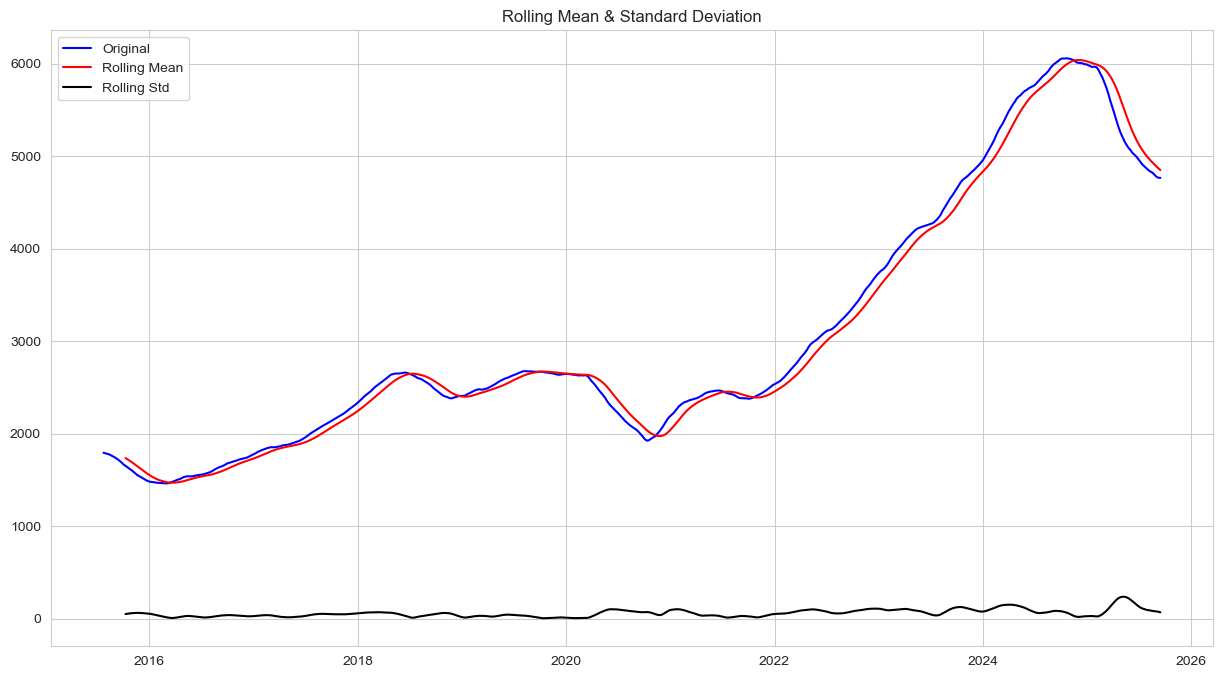

Results of Dickey-Fuller Test:
Test Statistic                  -1.327612
p-value                          0.616447
#Lags Used                      12.000000
Number of Observations Used    517.000000
Critical Value (1%)             -3.443062
Critical Value (5%)             -2.867147
Critical Value (10%)            -2.569756
dtype: float64


In [129]:
test_stationarity(df2['Price_Rolling_Mean'])

**Insight**:
- P-Value = 0.61, Higher then the alpha (0.05)
- Accept $H_0$ 
- Data is not stationary

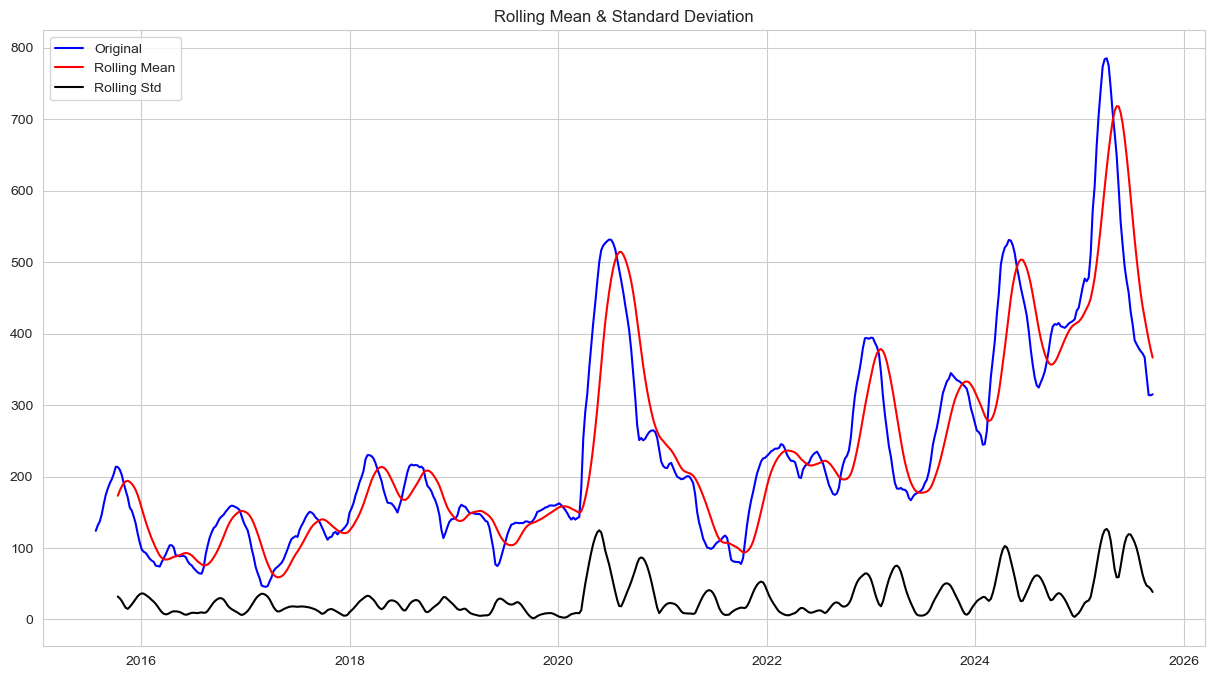

Results of Dickey-Fuller Test:
Test Statistic                  -2.265986
p-value                          0.183173
#Lags Used                       9.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64


In [131]:
test_stationarity(df2['Price_Rolling_Std'])

**Insight**:
- P-Value =  0.18, Higher then the alpha (0.05)
- Accept $H_0$ 
- Data is not stationary

In [197]:
Price = df2.Price_Detrended
Dates = df2.index

In [133]:
!pip install scalecast

In [198]:
from scalecast.Forecaster import Forecaster

f = Forecaster(y=Price, current_dates=Dates)

f.set_test_length(0.25)
f.generate_future_dates(90)

In [148]:
f

Forecaster(
    DateStartActuals=2015-07-26T00:00:00.000000000
    DateEndActuals=2025-09-14T00:00:00.000000000
    Freq=W-SUN
    N_actuals=530
    ForecastLength=90
    Xvars=[]
    TestLength=132
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

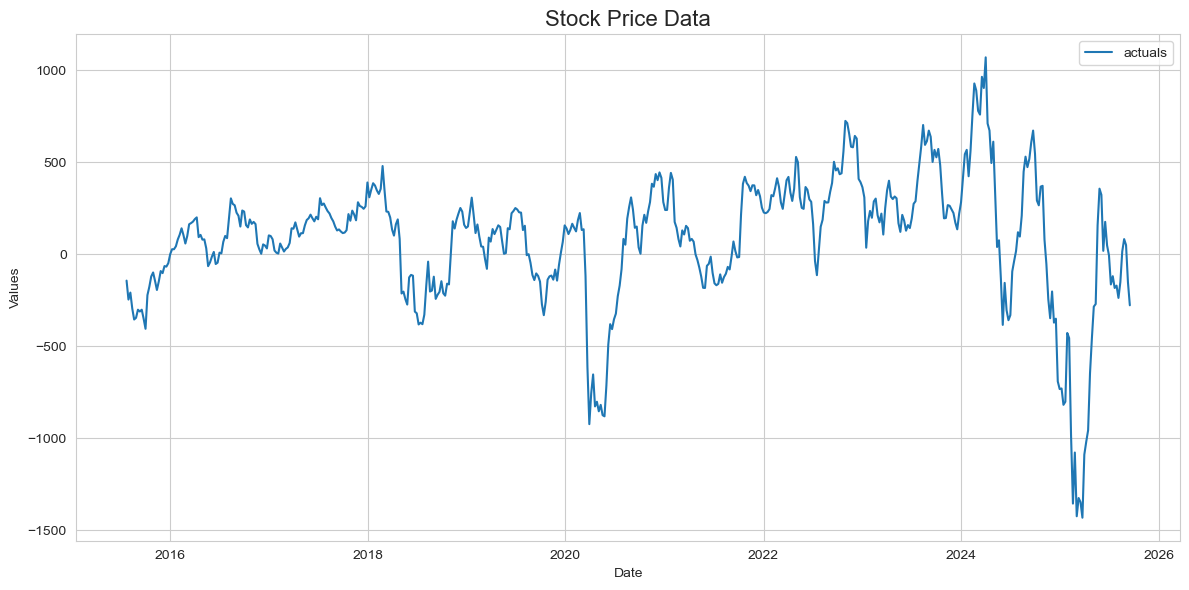

In [149]:
f.plot()
plt.title('Stock Price Data', size=16)
plt.tight_layout()
plt.show()

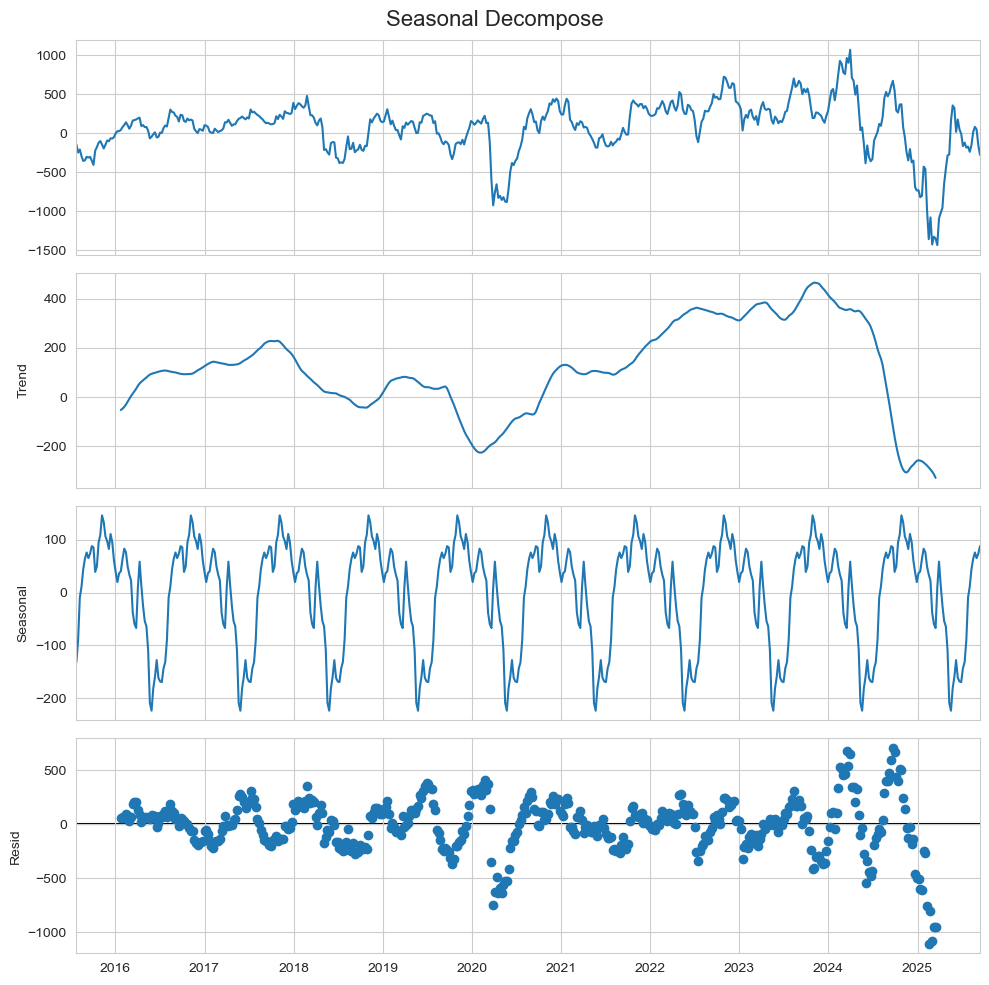

In [150]:
plt.rc("figure", figsize=(10,10))
f.seasonal_decompose().plot()
plt.suptitle('Seasonal Decompose', fontsize=16)
plt.tight_layout()
plt.show()

## Creating Models

### Linier Model

#### LSTM Model

In [139]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 3.4 MB/s eta 0:01:39
   ---------------------------------------- 1.3/331.9 MB 3.2 MB/s eta 0:01:44
   ---------------------------------------- 1.8/331.9 MB 3.2 MB/s eta 0:01:42
   ---------------------------------------- 2.6/331.9 MB 3.2 MB/s eta 0:01:43
   ---------------------------------------- 3.4/331.9 MB 3.3 MB/s eta 0:01:40
    --------------------------------------- 4.2/331.9 MB 3.3 MB/s eta 0:01:39
    --------------------------------------- 5.2/331.9 MB 3.5 MB/s eta 0:01:34
    --------------------------------------- 6.0/331.9 MB 3.6 MB/s eta 0:01:31
    --------------------------------------- 6.8/331.9 MB 3.7 MB/s eta 0:01:27
    --------------------------------------- 6.8/331.9 MB 3.7 MB/s eta 0:01:27
    --------------------------------------- 6.8/331.9 MB 3.7 MB/s eta 0:01:27
    --------------------------------------- 7.9/331.9 MB 3.2 MB/s eta 0

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


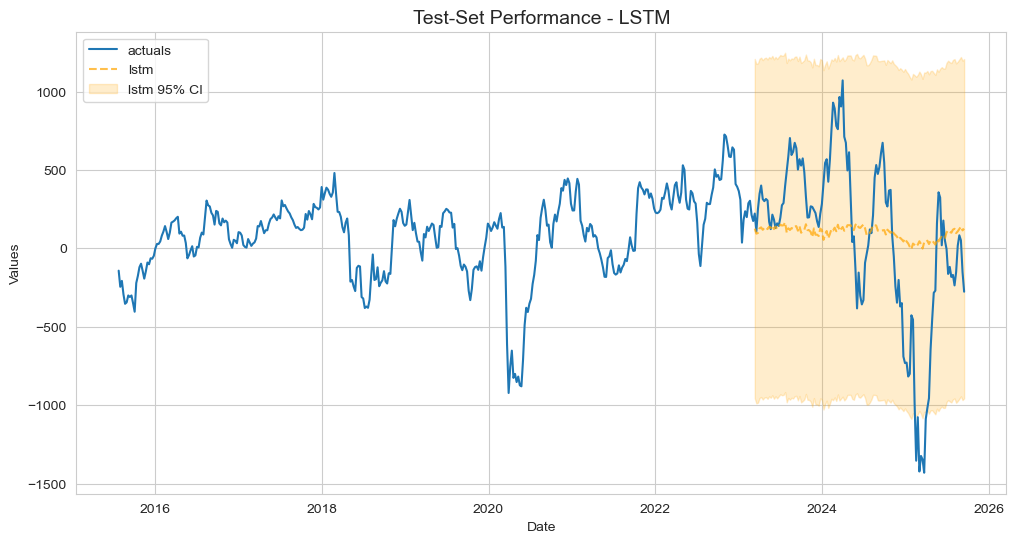

In [151]:
f.add_seasonal_regressors('week', raw=False, sincos=True)
f.set_estimator('lstm')
f.eval_cis(mode=True, cilevel=0.95)
f.manual_forecast(
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(100,)*3,
    dropout=(0,)*3,
    verbose=False
)

f.plot_test_set(models='lstm', ci=True)
plt.title('Test-Set Performance - LSTM', size=14)
plt.show()

#### Multiple Linier Regression

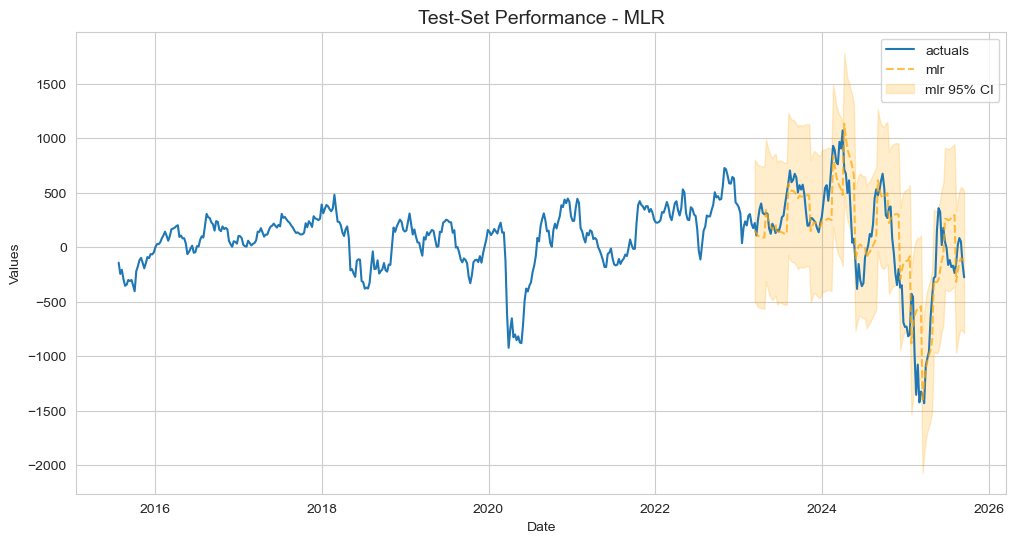

In [201]:
f.set_estimator('mlr') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_seasonal_regressors('year') 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='mlr', dynamic_testing=7)
f.plot_test_set(models='mlr', ci=True)
plt.title('Test-Set Performance - MLR', size=14)
plt.show()

#### Ridge

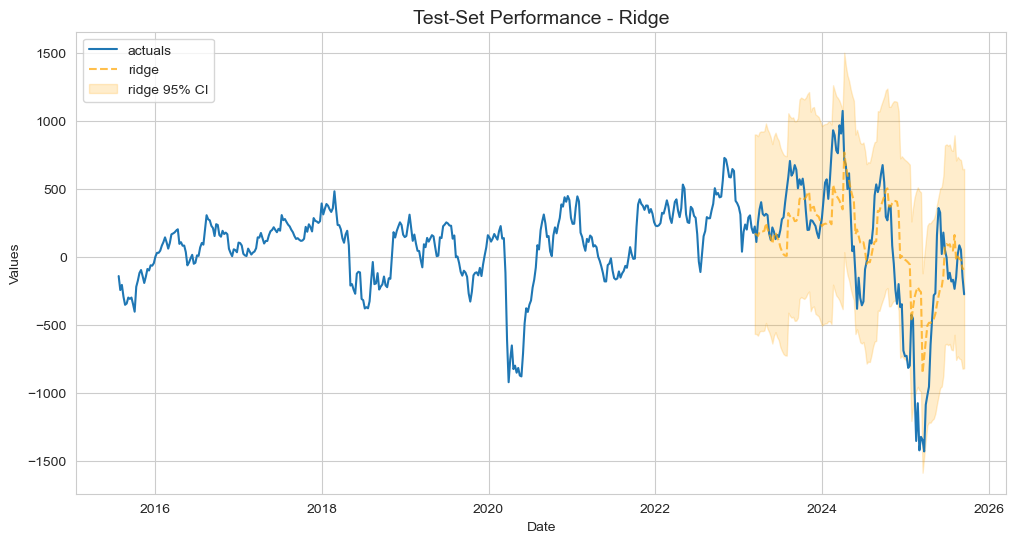

In [153]:
f.set_estimator('ridge') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='ridge', dynamic_testing=7)
f.plot_test_set(models='ridge', ci=True)
plt.title('Test-Set Performance - Ridge', size=14)
plt.show()

#### Lasso

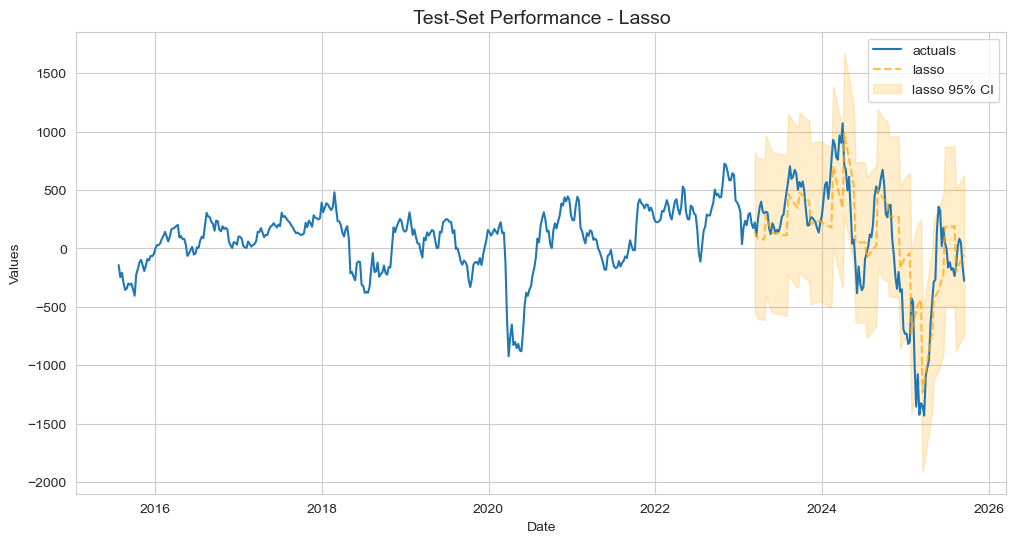

In [154]:
f.set_estimator('lasso') 
f.add_ar_terms(7) 
f.add_seasonal_regressors('month','quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='lasso', dynamic_testing=7)
f.plot_test_set(models='lasso', ci=True)
plt.title('Test-Set Performance - Lasso', size=14)
plt.show()

#### Model Evaluation

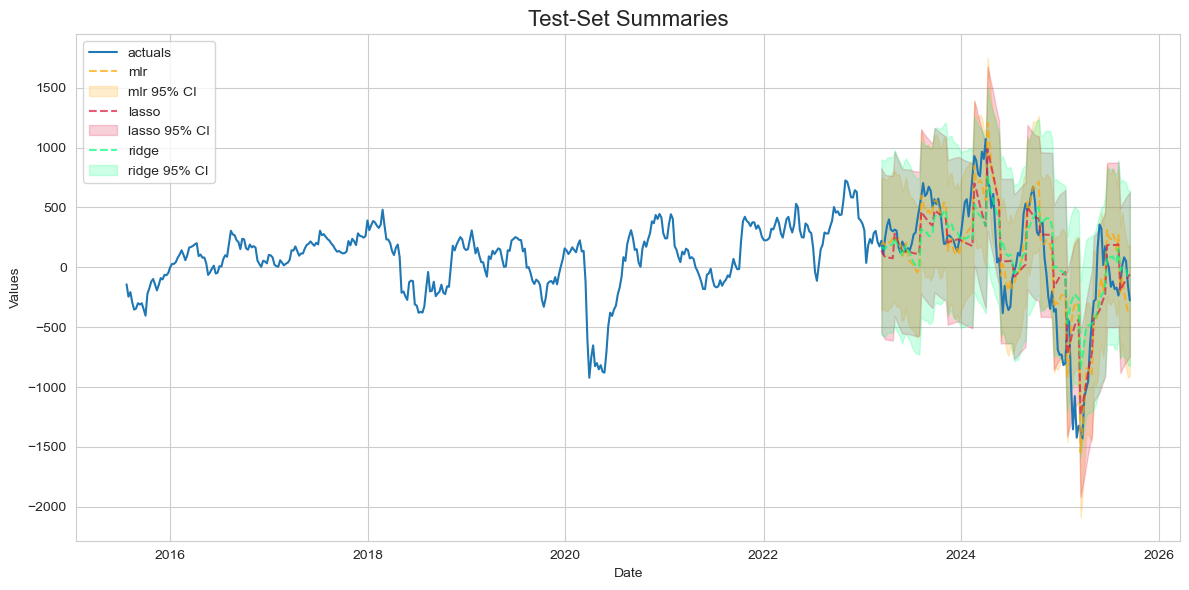

In [155]:
f.plot_test_set(ci=True, models=['mlr','lasso','ridge'], order_by='TestSetRMSE')
plt.title('Test-Set Summaries', fontsize=16)
plt.tight_layout()
plt.show()

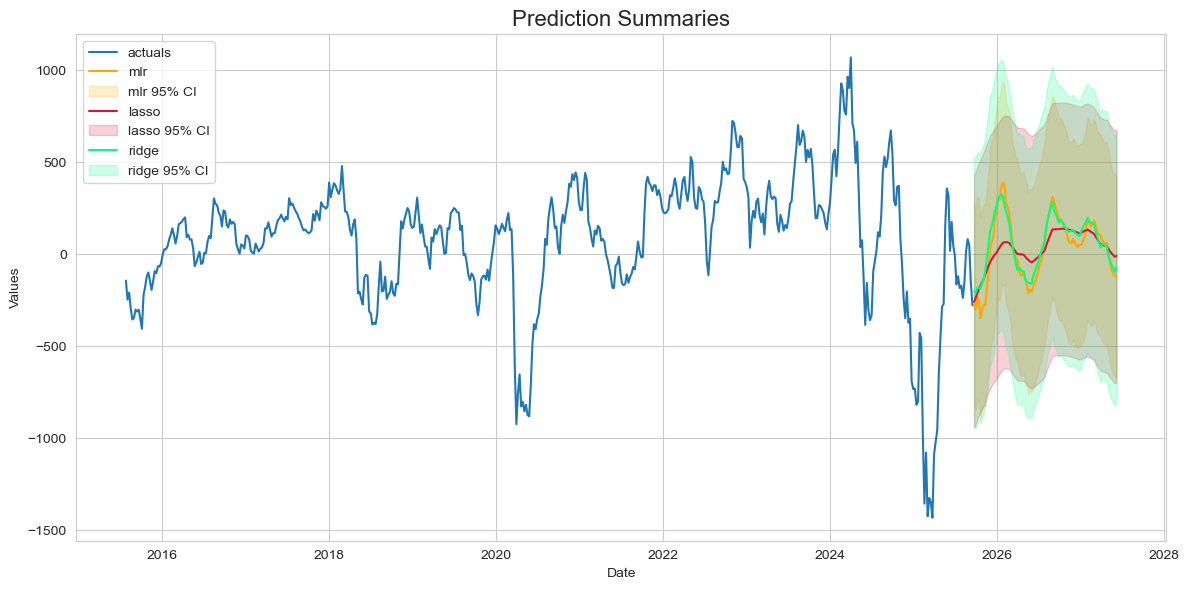

In [156]:
f.plot(ci=True, models=['mlr','lasso','ridge'], order_by='TestSetRMSE')
plt.title('Prediction Summaries', fontsize=16)
plt.tight_layout()
plt.show()

### Non-Linier Model

#### Random Forest Model 

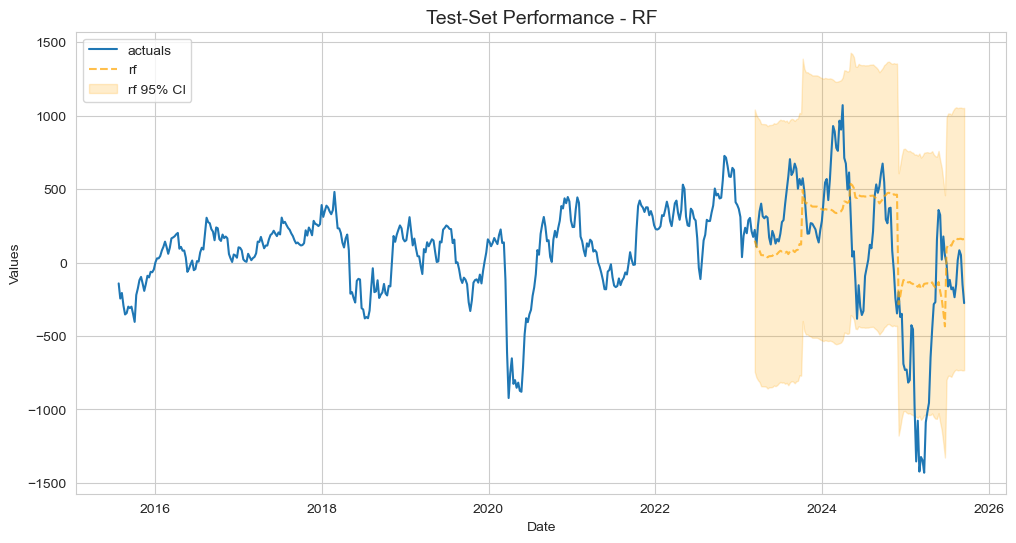

In [157]:
f.set_estimator('rf') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='rf', dynamic_testing=30, max_depth=30)
f.plot_test_set(models='rf', ci=True)
plt.title('Test-Set Performance - RF', size=14)
plt.show()

#### XGBoost Model

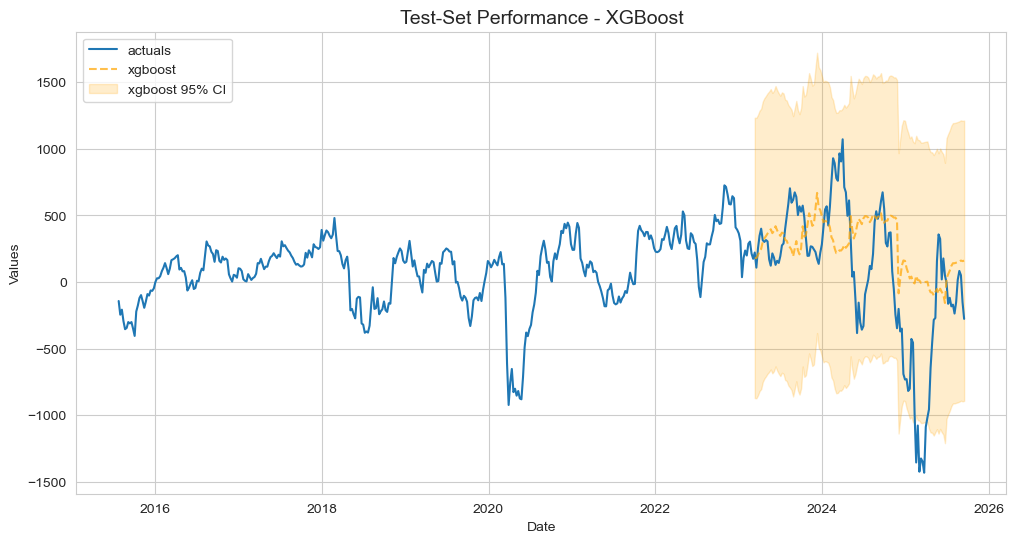

In [158]:
f.set_estimator('xgboost') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='xgboost', dynamic_testing=30, gamma=1)
f.plot_test_set(models='xgboost', ci=True)
plt.title('Test-Set Performance - XGBoost', size=14)
plt.show()

#### LightGBM Model

In [159]:
!pip install lightgbm

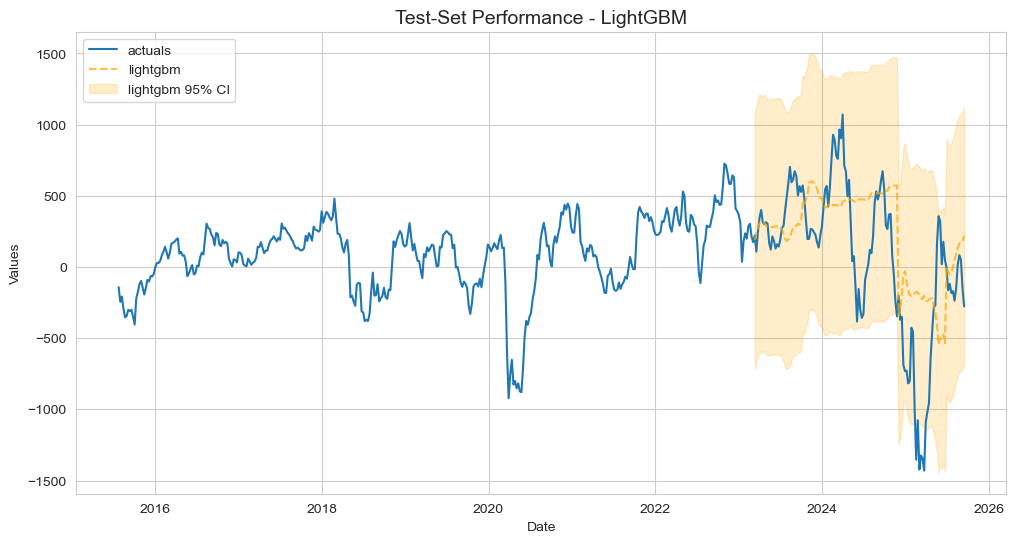

In [160]:
f.set_estimator('lightgbm') 
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='lightgbm', dynamic_testing=30, max_depth=3, num_leaves=10, force_col_wise=True, verbose=-1)
f.plot_test_set(models='lightgbm', ci=True)
plt.title('Test-Set Performance - LightGBM', size=14)
plt.show()

#### KNN Model

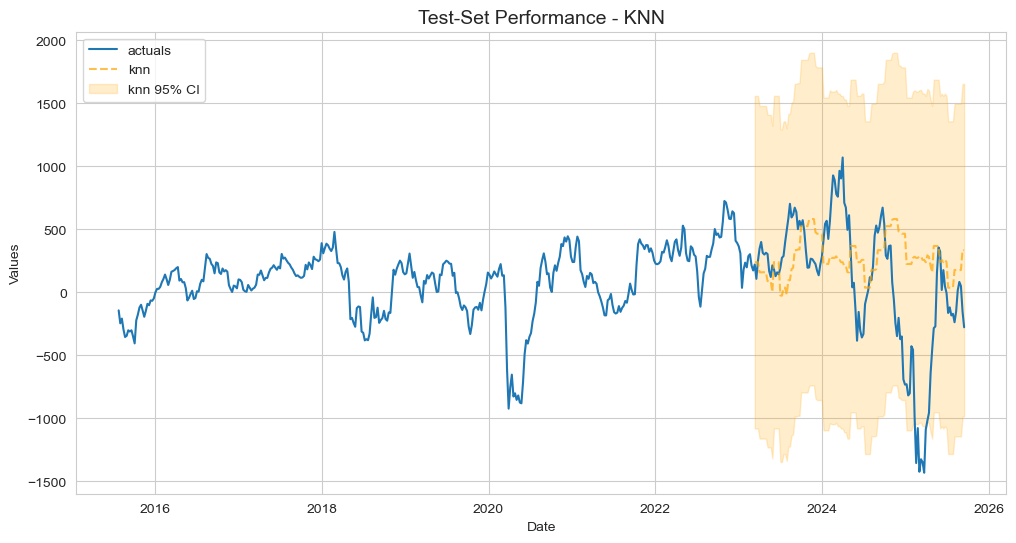

In [161]:
f.set_estimator('knn')
f.add_ar_terms(30) 
f.add_seasonal_regressors('month', 'quarter', dummy=True) 
f.add_time_trend()
f.eval_cis(mode=True, cilevel=0.95)

f.manual_forecast(call_me='knn', n_neighbors=5, dynamic_testing=30)
f.plot_test_set(models='knn', ci=True)
plt.title('Test-Set Performance - KNN', size=14)
plt.show()

#### Model Evaluation

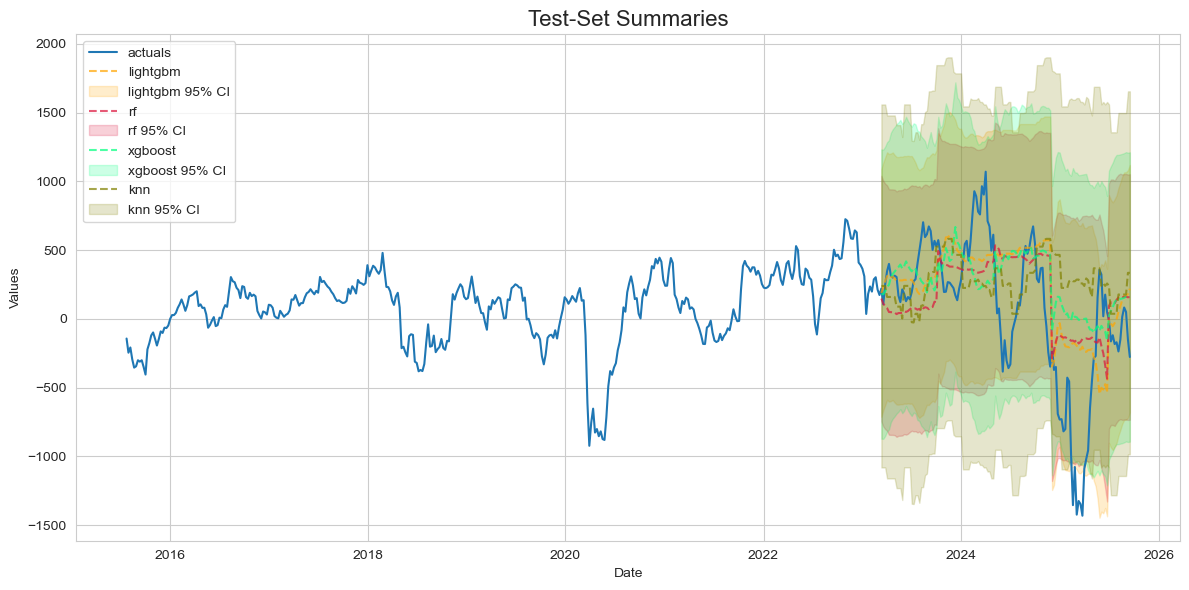

In [163]:
f.plot_test_set(
    ci=True,
    models=['rf','xgboost','lightgbm','knn'],
    order_by='TestSetRMSE'
)
plt.title('Test-Set Summaries', size=16)
plt.tight_layout()
plt.show()

### Other Model

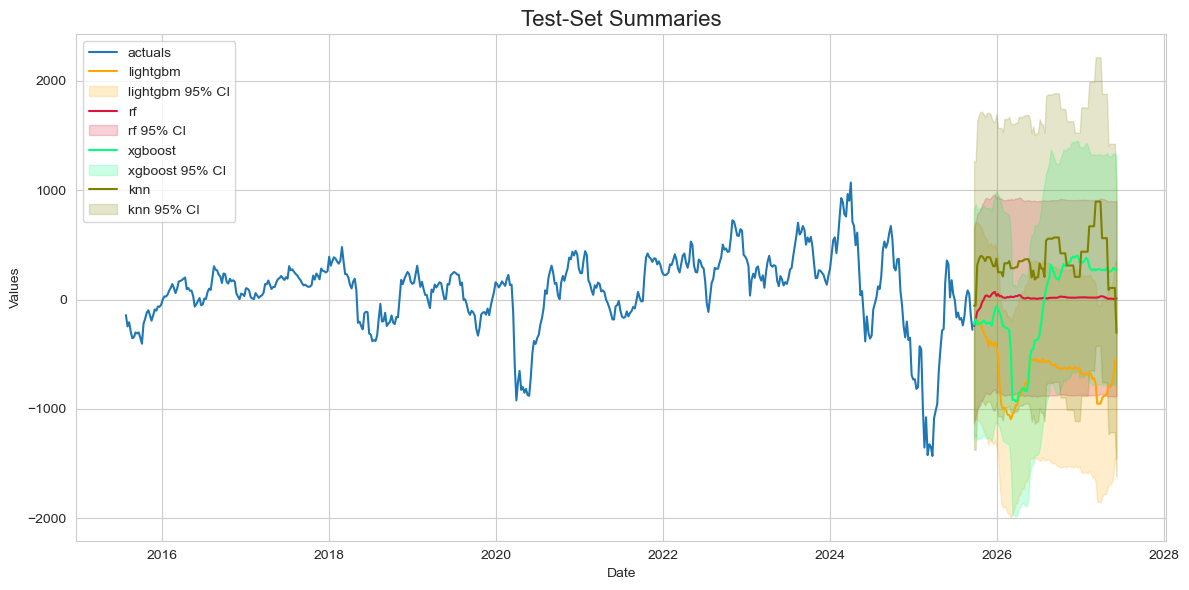

In [164]:
f.plot(
    ci=True,
    models=['rf','xgboost','lightgbm','knn'],
    order_by='TestSetRMSE'
)
plt.title('Test-Set Summaries', size=16)
plt.tight_layout()
plt.show()

15:25:59 - cmdstanpy - INFO - Chain [1] start processing
15:25:59 - cmdstanpy - INFO - Chain [1] done processing
15:26:00 - cmdstanpy - INFO - Chain [1] start processing
15:26:00 - cmdstanpy - INFO - Chain [1] done processing


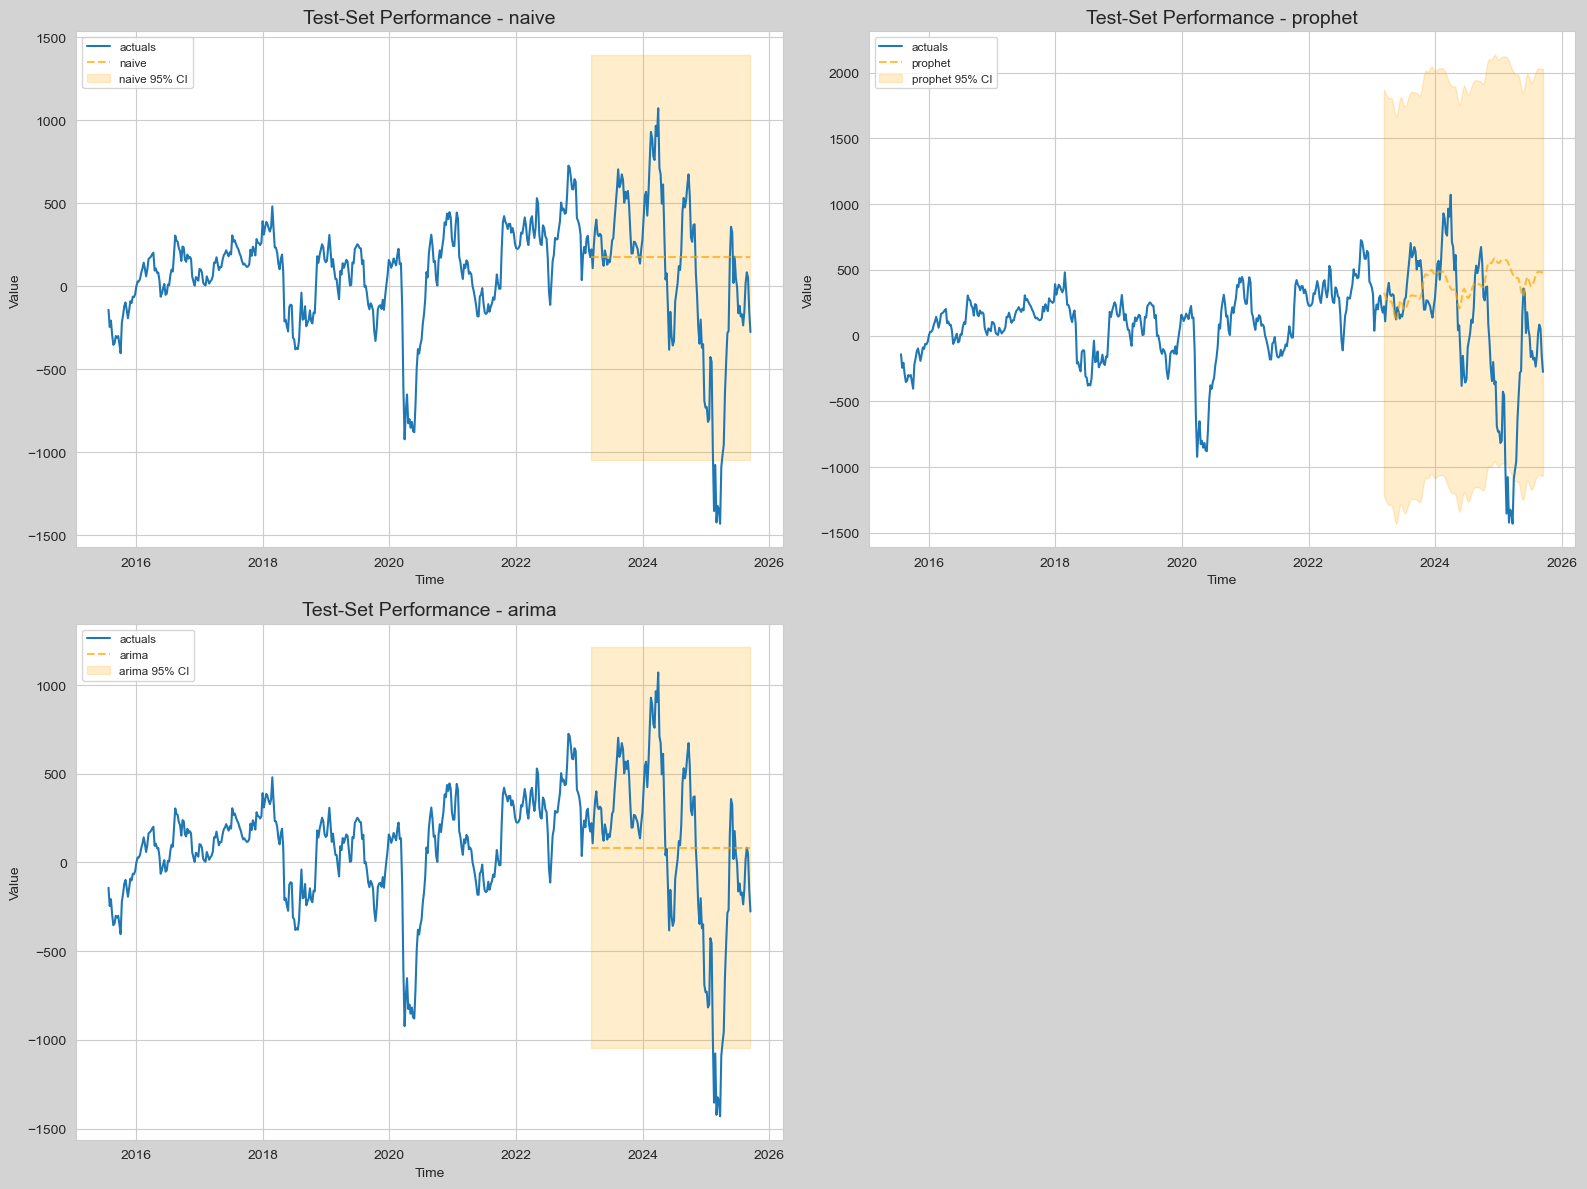

In [165]:
model_list = ['naive', 'prophet', 'arima'] 

num_rows = (len(model_list) + 1) // 2
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6 * num_rows))
fig.set_facecolor('lightgrey')

for i, model in enumerate(model_list):
    row = i // 2
    col = i % 2

    f.set_estimator(model)
    f.add_ar_terms(7)
    f.add_seasonal_regressors('quarter', dummy=True)
    f.add_time_trend()
    f.eval_cis(mode=True, cilevel=0.95)
    f.manual_forecast(call_me=model, dynamic_testing=True)
    f.plot_test_set(models=model, ci=True, include_train=True, ax=axs[row, col])

    axs[row, col].set_title(f'Test-Set Performance - {model}', size=14)
    axs[row, col].set_xlabel('Time')
    axs[row, col].set_ylabel('Value')
    axs[row, col].grid(True)
    axs[row, col].legend(loc='upper left', fontsize='small')

# Remove unused subplot if model count is odd (in this case: 3 models -> 2 rows x 2 cols = 4 subplots)
for i in range(len(model_list), num_rows * 2):
    row = i // 2
    col = i % 2
    fig.delaxes(axs[row, col])

plt.tight_layout()
plt.show()

## Model Evaluation

In [166]:
results = f.export(dfs=['model_summaries','lvl_fcsts'], cis=True, to_excel=True)
model_summaries = results['model_summaries']
lvl_fcsts = results['lvl_fcsts'] 
ts_preds = f.export('lvl_test_set_predictions') 

In [167]:
model_eval = model_summaries[['ModelNickname','TestSetMAPE','TestSetRMSE','TestSetR2']].copy()

In [170]:
model_eval['Rank'] = model_eval['TestSetRMSE'].rank(ascending=True).astype(int)
model_eval.style.background_gradient(cmap='Blues')

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,Rank
0,lstm,1.115935,507.499920,0.091551,7
1,mlr,1.489250,314.942877,0.650142,1
2,ridge,1.164961,375.107036,0.503706,3
3,lasso,1.426188,332.604116,0.609803,2
4,rf,1.838474,466.867498,0.231195,5
5,xgboost,1.672352,506.976999,0.093422,6
6,lightgbm,1.831321,459.201585,0.256236,4
7,knn,1.804540,591.849593,-0.235525,10
8,naive,1.414517,540.658071,-0.031037,9
9,prophet,2.568589,665.853174,-0.563816,11


In [172]:
model_eval = model_eval.sort_values(by='Rank')
model_eval.style.background_gradient(cmap='Blues')

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,Rank
1,mlr,1.489250,314.942877,0.650142,1
3,lasso,1.426188,332.604116,0.609803,2
2,ridge,1.164961,375.107036,0.503706,3
6,lightgbm,1.831321,459.201585,0.256236,4
4,rf,1.838474,466.867498,0.231195,5
5,xgboost,1.672352,506.976999,0.093422,6
0,lstm,1.115935,507.499920,0.091551,7
10,arima,1.105506,532.471897,-0.000051,8
8,naive,1.414517,540.658071,-0.031037,9
7,knn,1.804540,591.849593,-0.235525,10


## Prediction

In [173]:
# Filter the DataFrame based on rank
filtered_df = model_eval[model_eval['Rank'].between(1,5)]

# Extract the ModelNickname values as a list
best_model = filtered_df['ModelNickname'].tolist()
best_model

['mlr', 'lasso', 'ridge', 'lightgbm', 'rf']

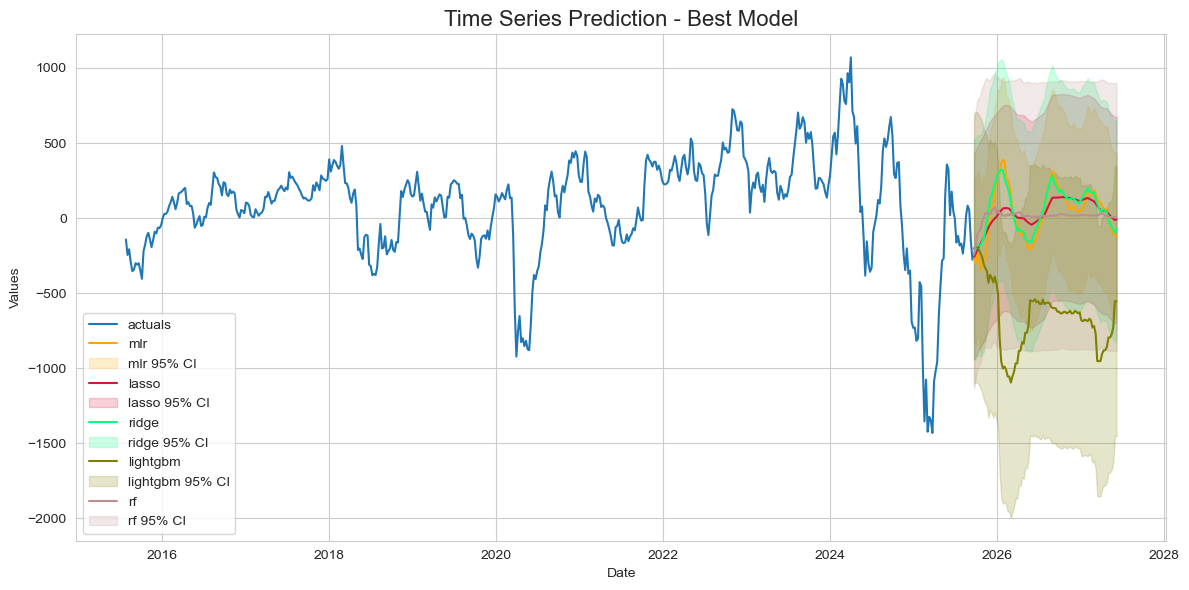

In [ ]:
f.plot(models=best_model, order_by='TestSetR2', ci=True)
plt.title('Time Series Prediction - Best Model', size=16)
plt.tight_layout()
plt.show()

**Insight**:
- The majority of high-performing models indicate a downward trajectory in the forecast, with values converging toward and stabilizing near zero.

- This pattern implies that BMRI’s stock price is projected to remain consistent with its prevailing trend over the forecast period.

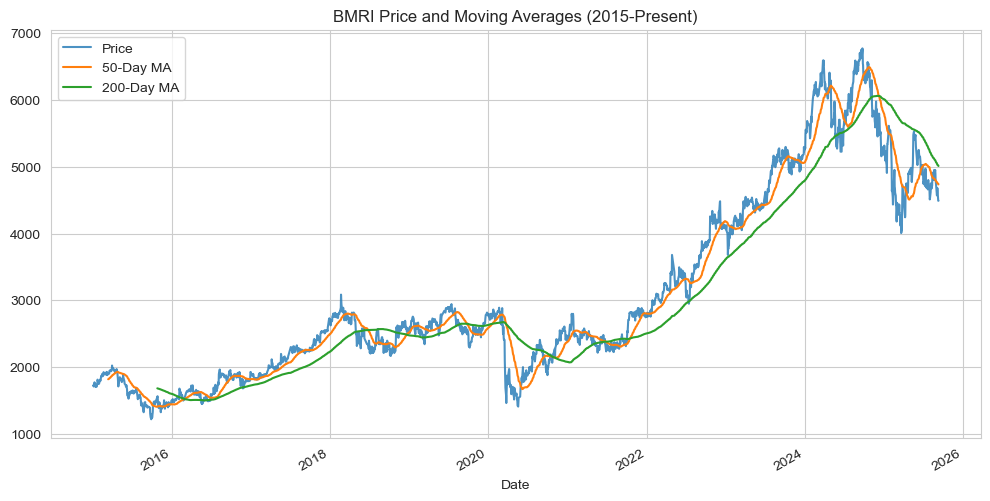

In [207]:
plt.figure(figsize=(12,6))
df['adj_close'].plot(label='Price', alpha=0.8)
df['MA50'].plot(label='50-Day MA')
df['MA200'].plot(label='200-Day MA')
plt.title(f'BMRI Price and Moving Averages (2015-Present)')
plt.legend()
plt.show()

**Insight**:
- BMRI has recently exhibited a bearish trend, characterized by a prolonged downtrend in its stock performance.

- Therefore, when the forecast indicates that the stock price is likely to follow the prevailing trend, it suggests that `BMRI's stock price` is expected to continue its downward trajectory. (***Ceteris paribus***)

- As reported by Tempo, the recent downward trend in the market is believed to be driven by declining consumer purchasing power, resulting in consecutive deflationary periods during January and February.

https://www.tempo.co/ekonomi/daya-beli-masyarakat-lesu-di-awal-2025-deflasi-phk-massal-dan-krisis-global-jadi-pemicu-utama-1224001

- This is also backed by **Angelica Giovanni Gunarto** and **H. M. Roy Sembel** in their research of ***THE EFFECT OF MACROECONOMY ON STOCK PERFORMANCE OF LQ45 COMPANIES AT IDX***, 2019

- Investigating the root causes behind this phenomenon would serve as a meaningful direction for future research and policy analysis.